In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

from warnings import simplefilter
simplefilter("ignore")

In [2]:
df = pd.read_csv("data.csv")
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [3]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
val = df["Bankrupt?"].value_counts().reset_index(name="count")
val

Bankrupt?  count
0          0   6599
1          1    220

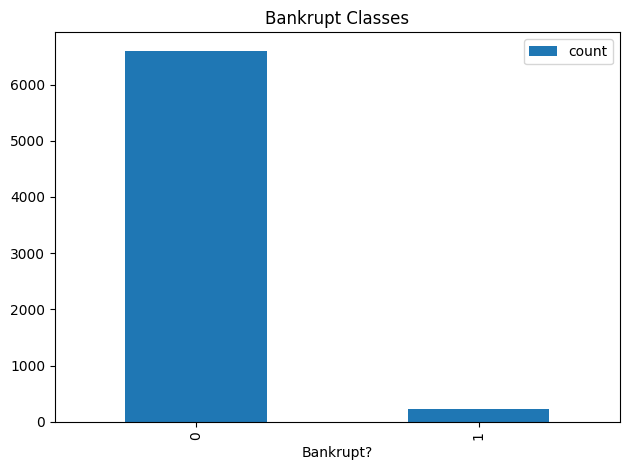

In [6]:
def label_function(val):
    return f'{val:0f}%'

labels = ["No Bankrupt", "Bankrupt"]

val.plot(x = "Bankrupt?", y = "count", kind = 'bar')
plt.ylabel("")
plt.title("Bankrupt Classes")
plt.tight_layout()

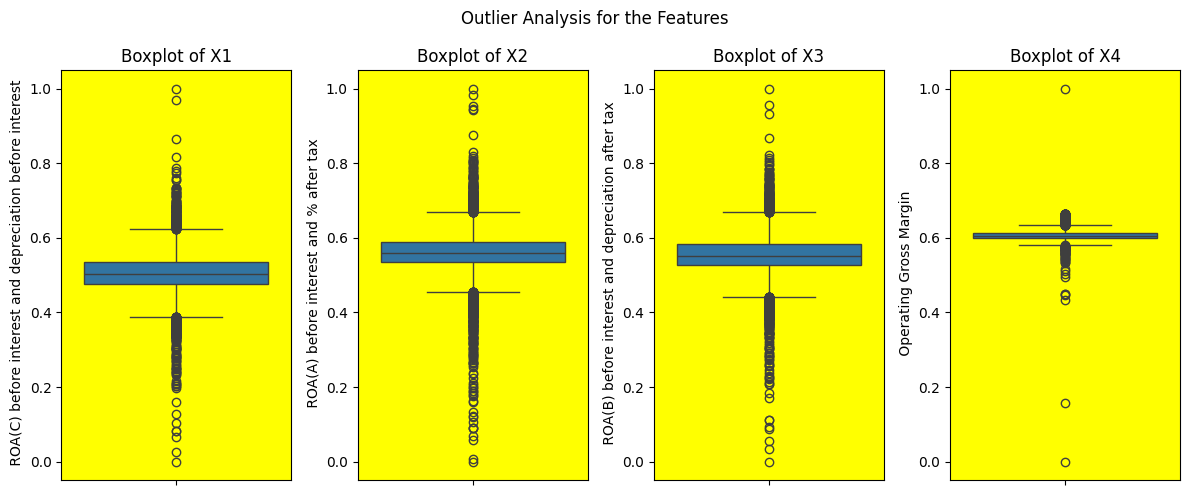

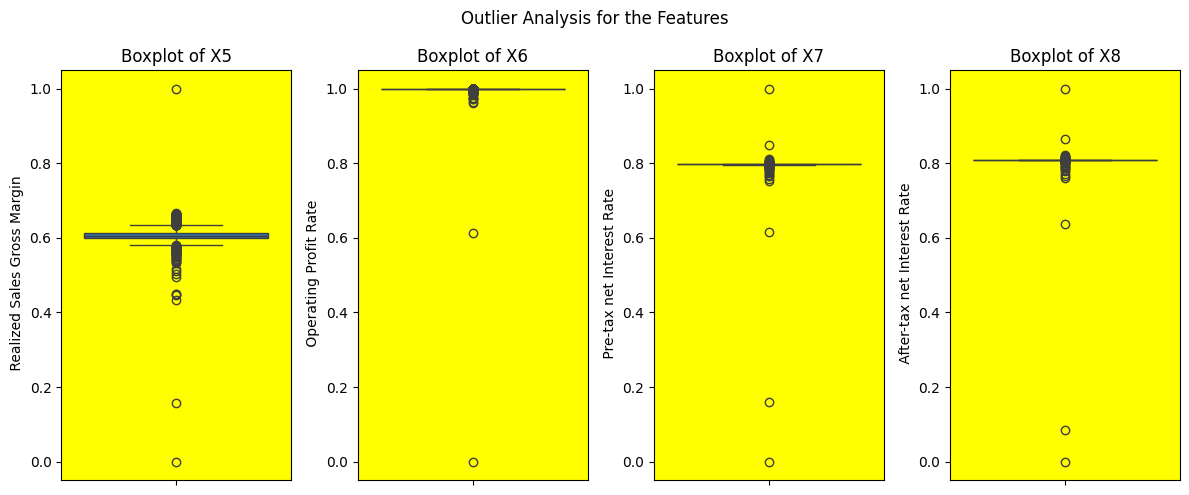

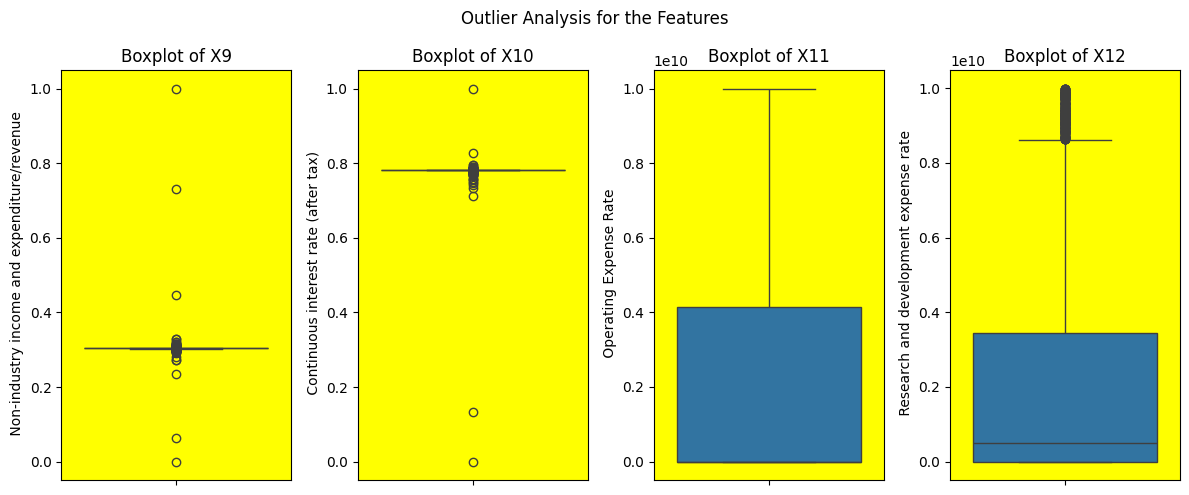

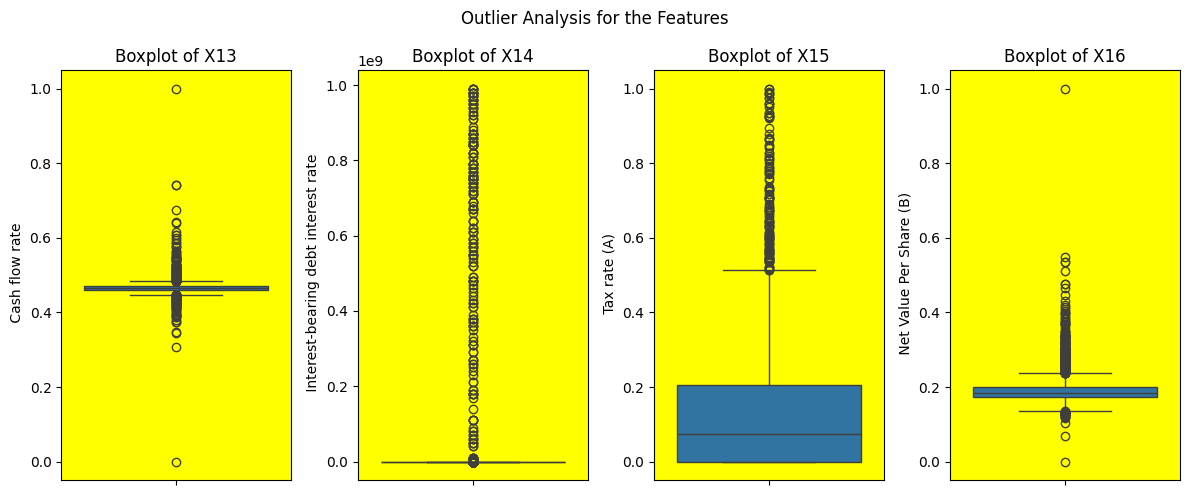

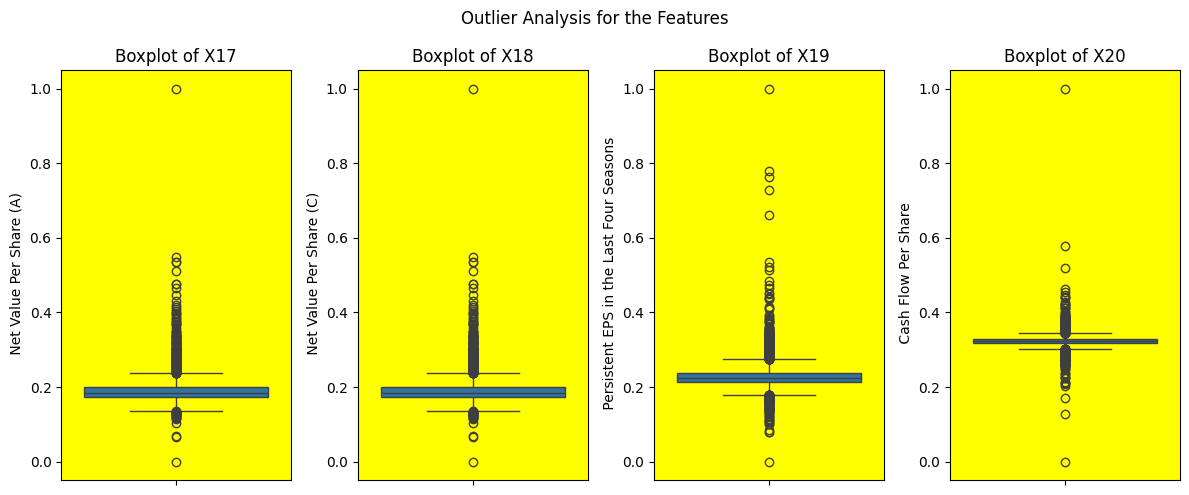

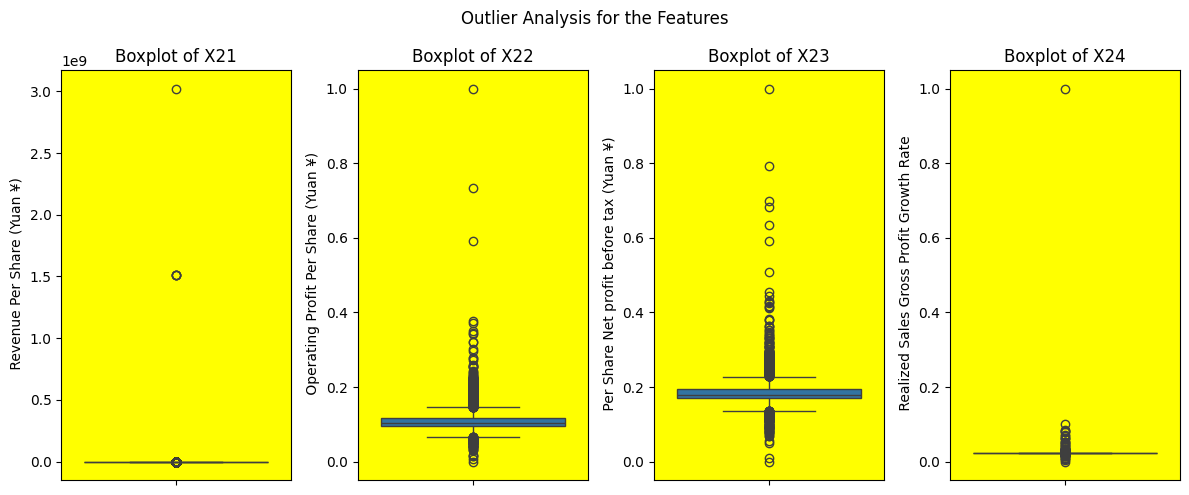

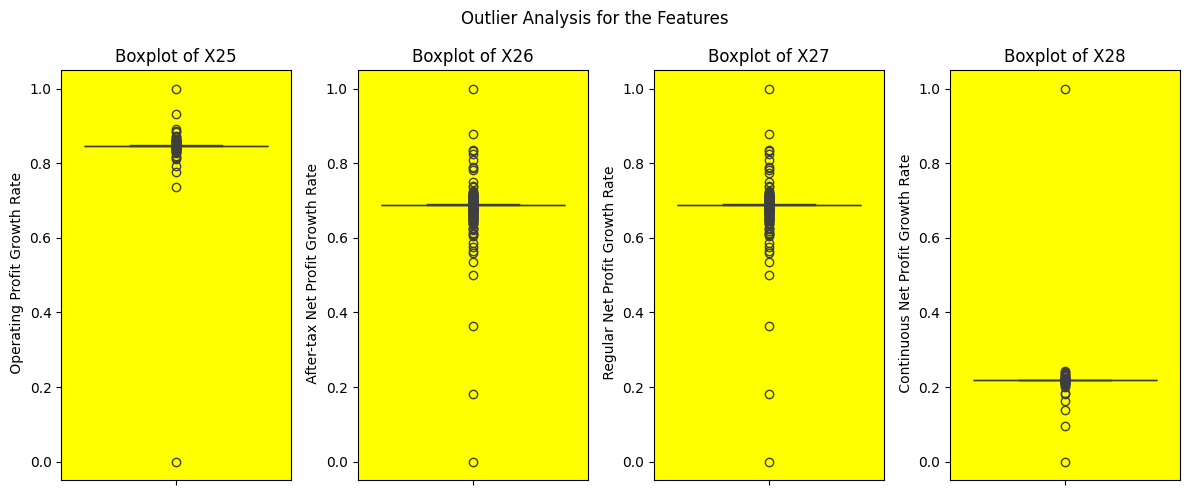

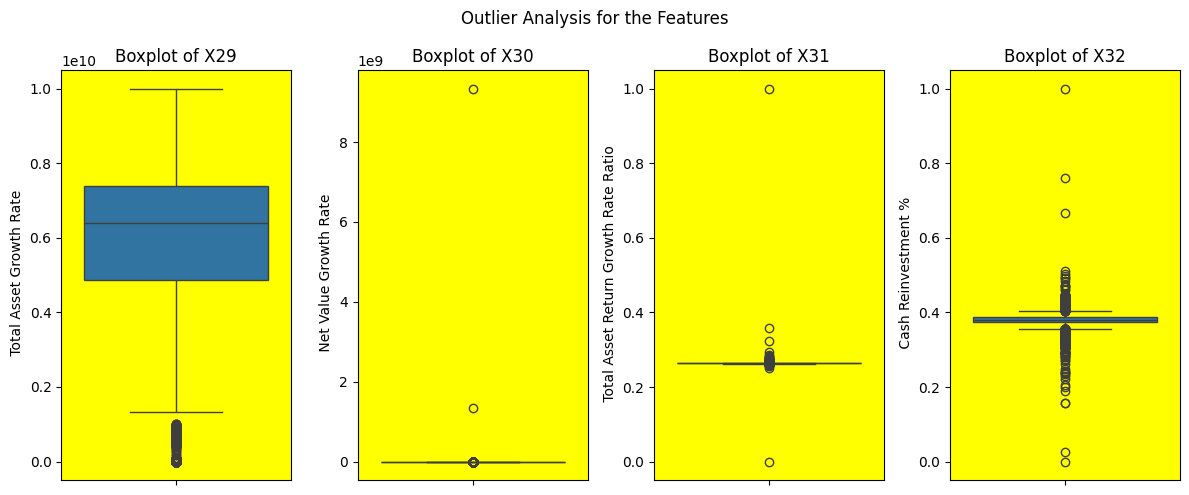

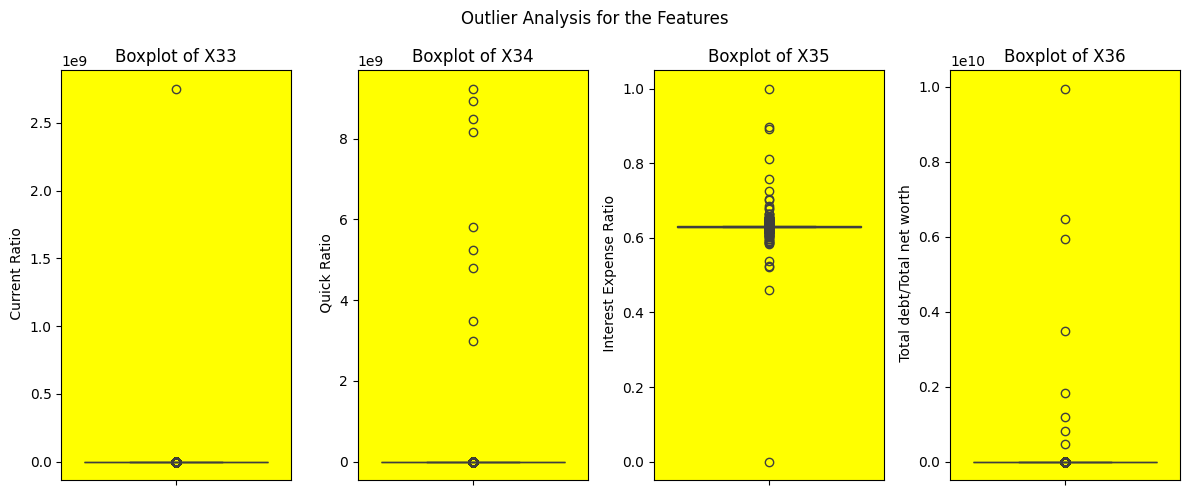

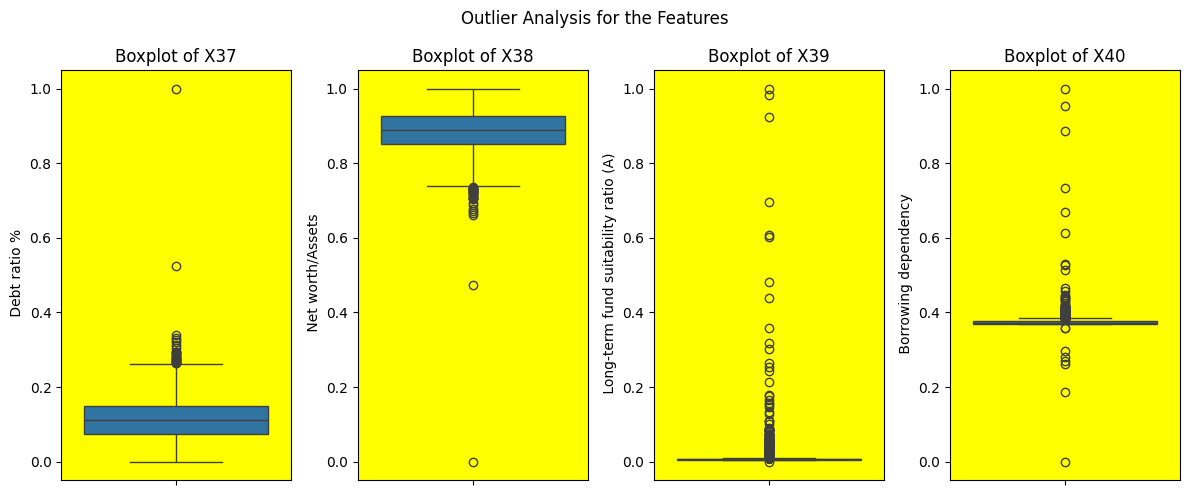

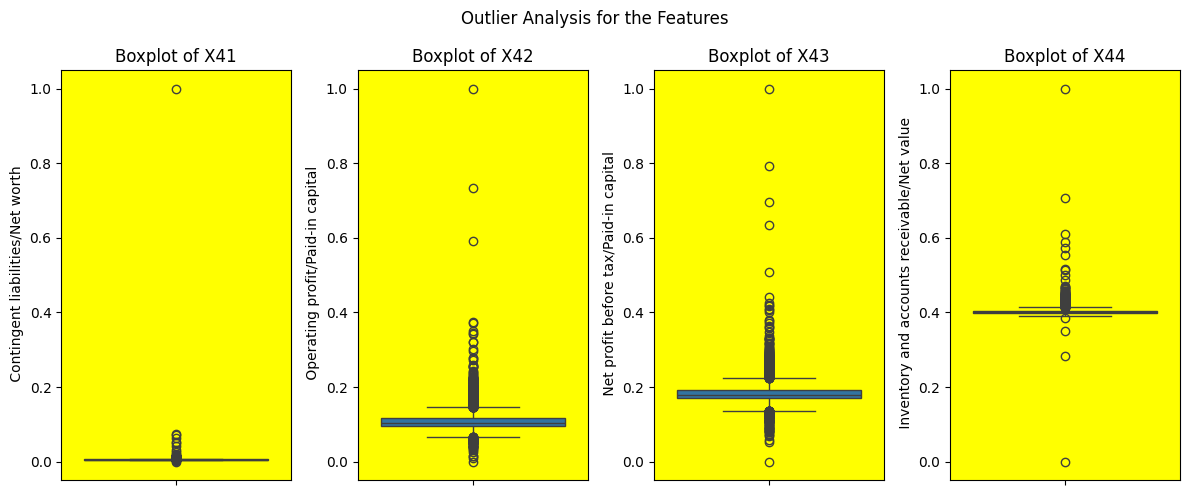

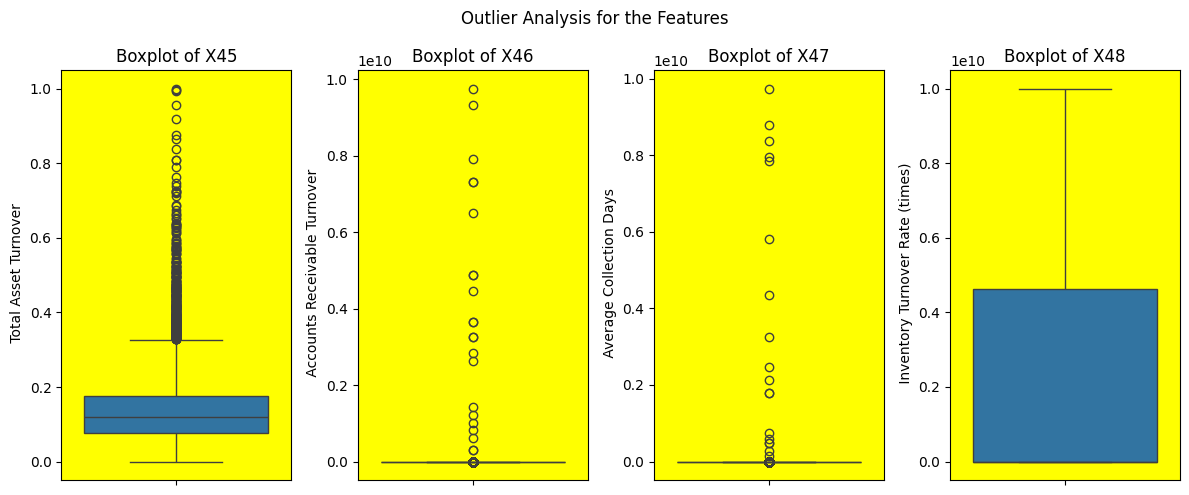

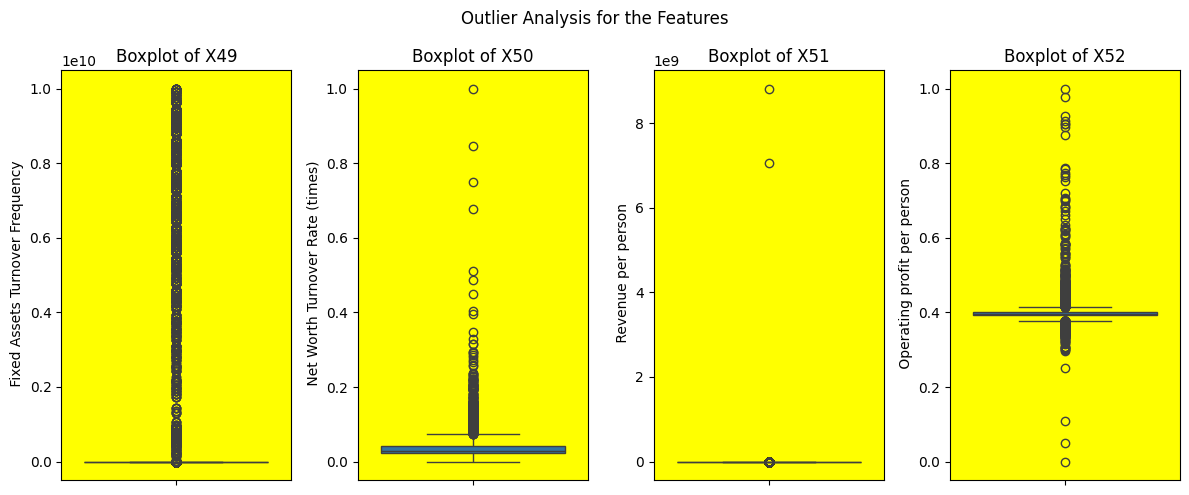

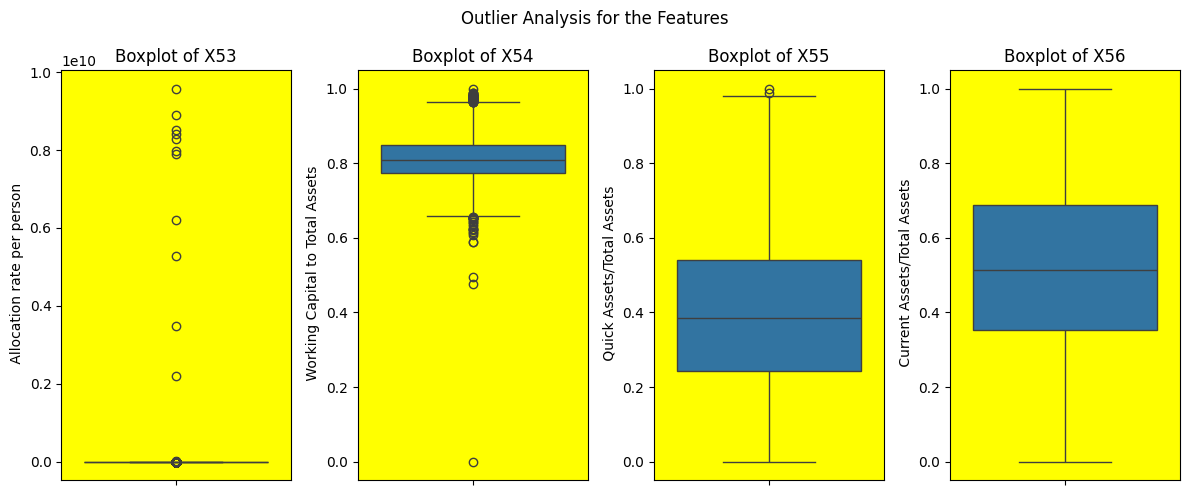

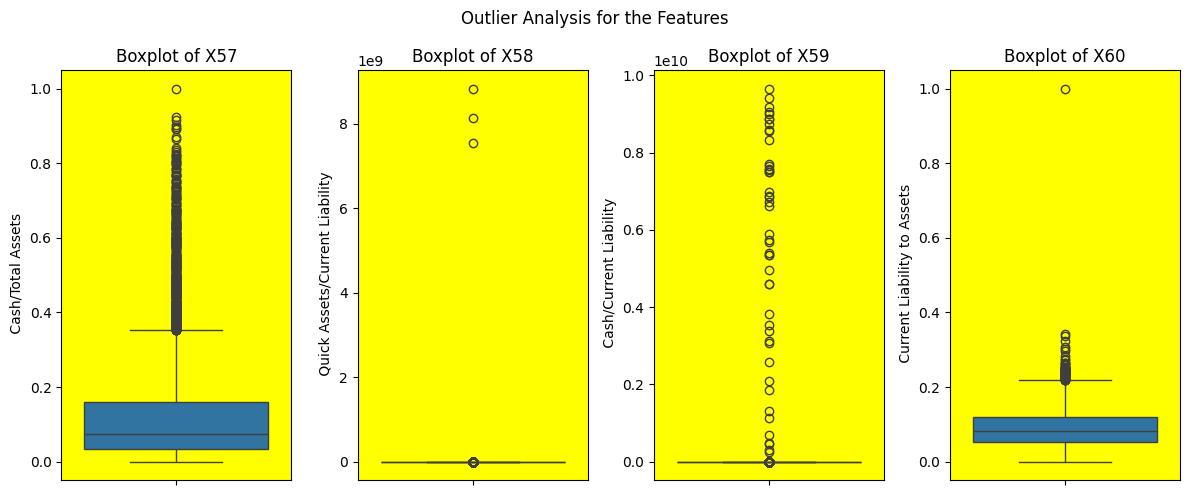

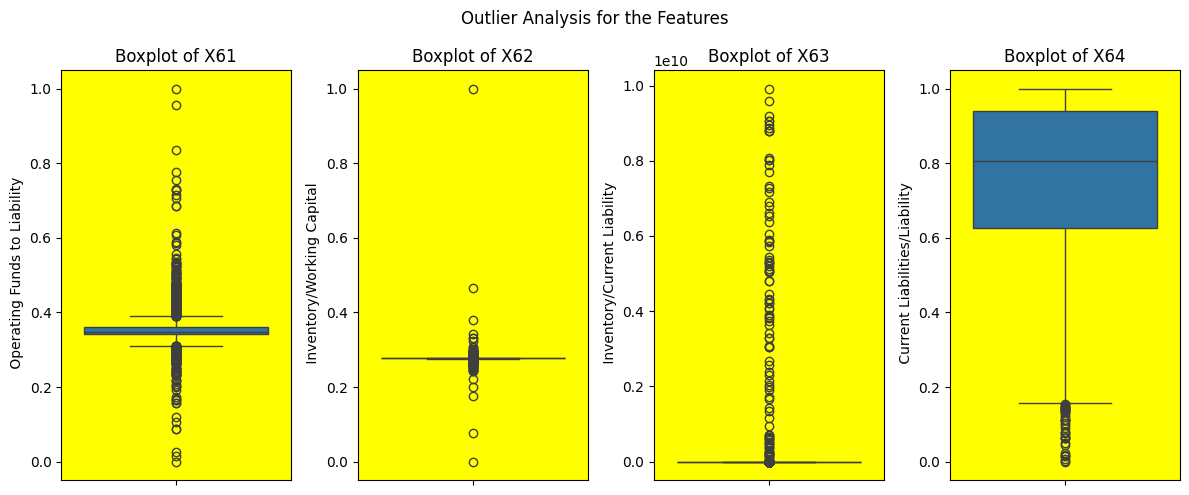

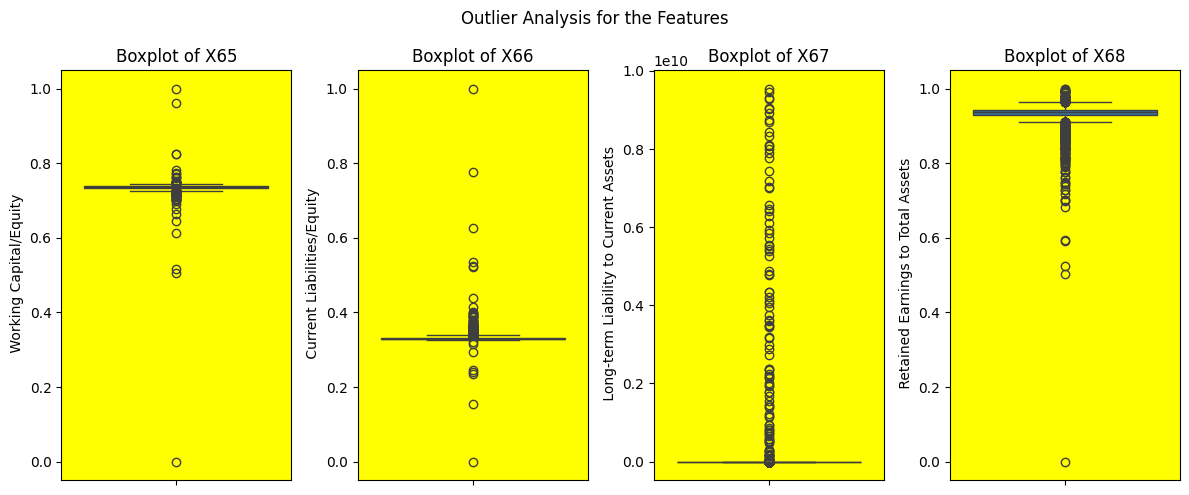

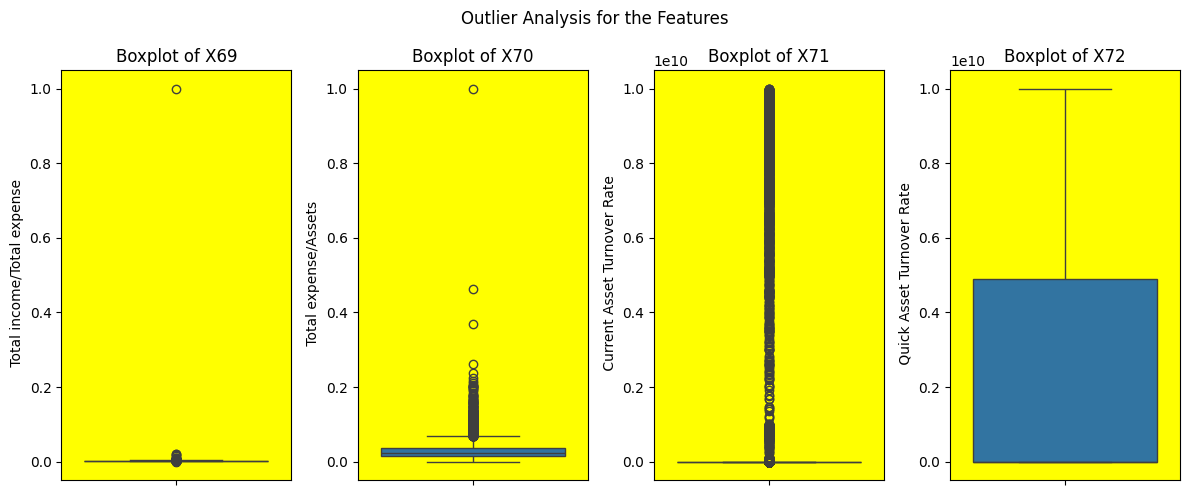

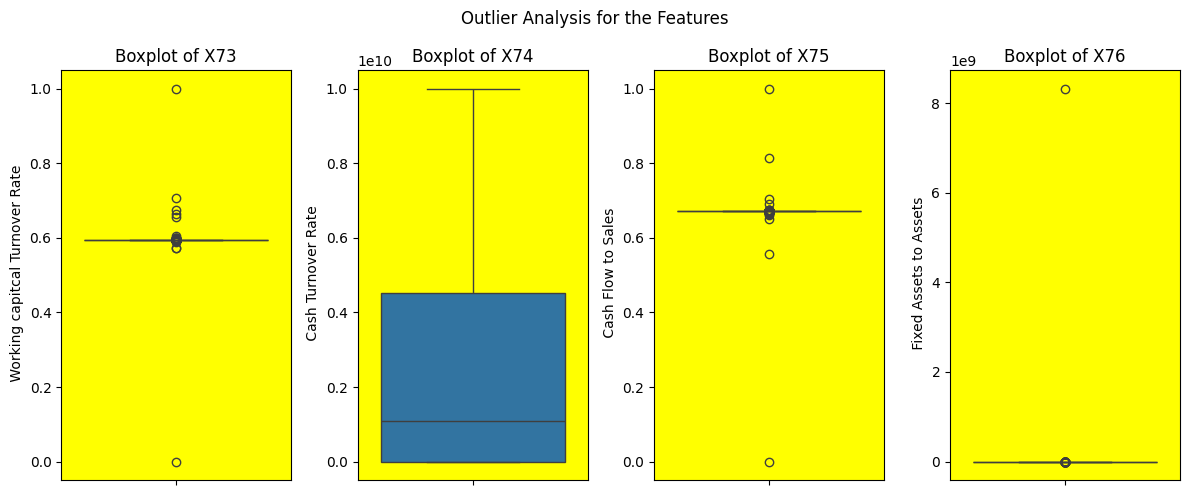

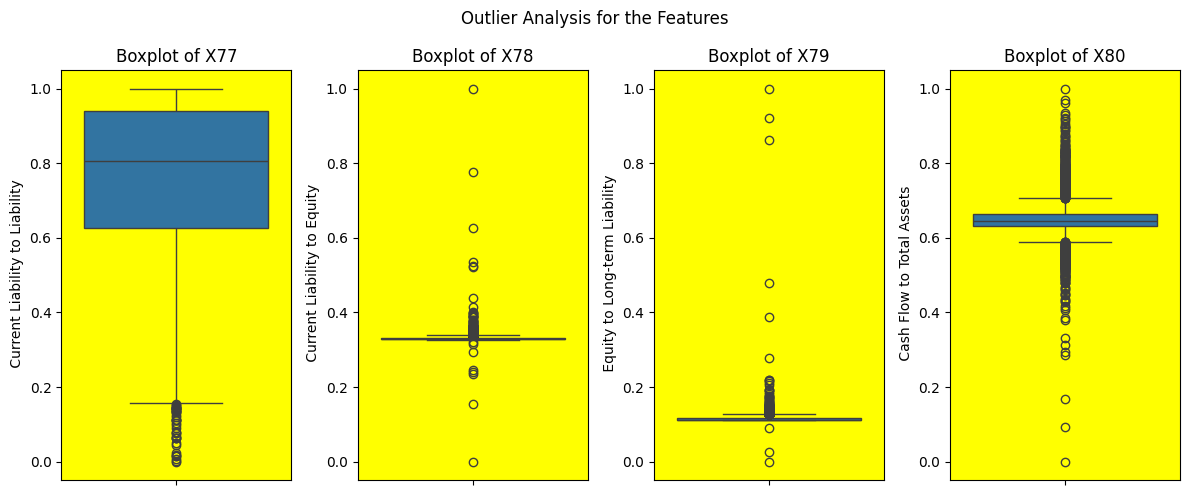

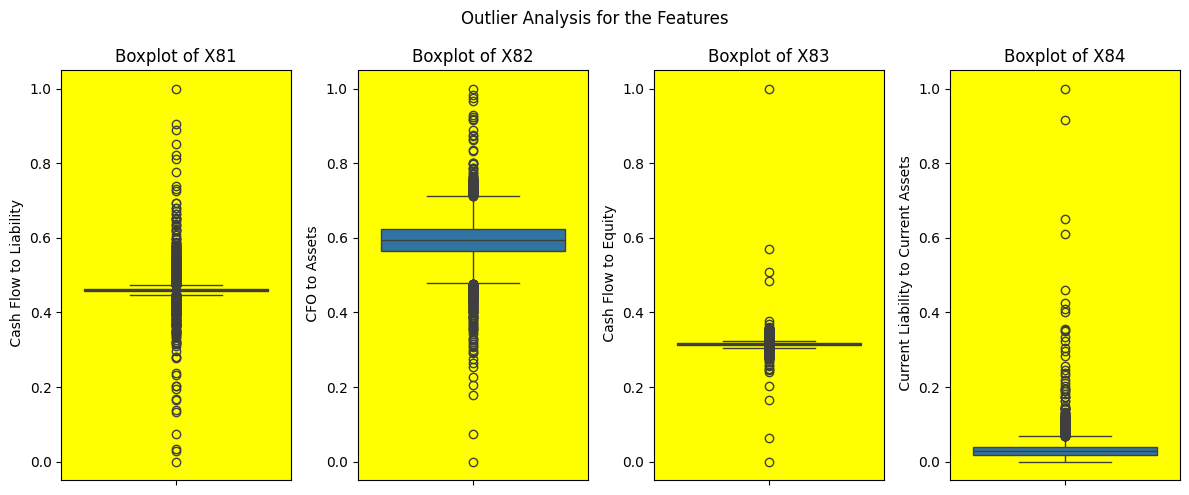

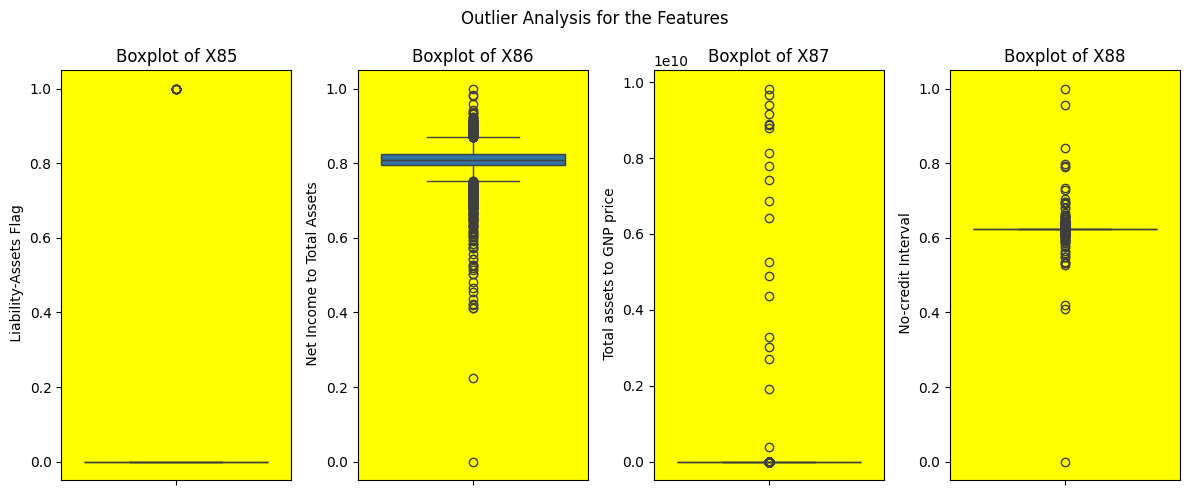

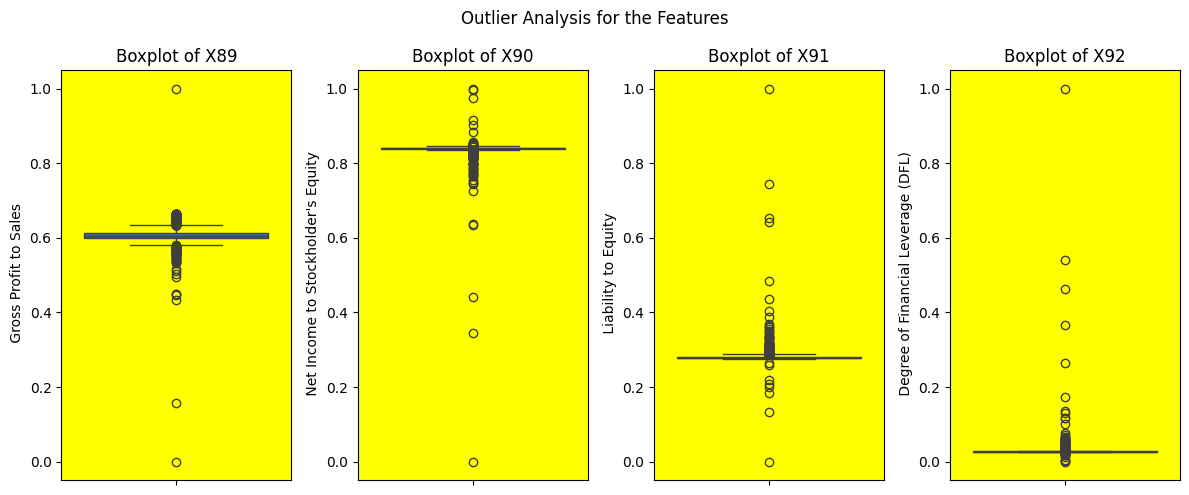

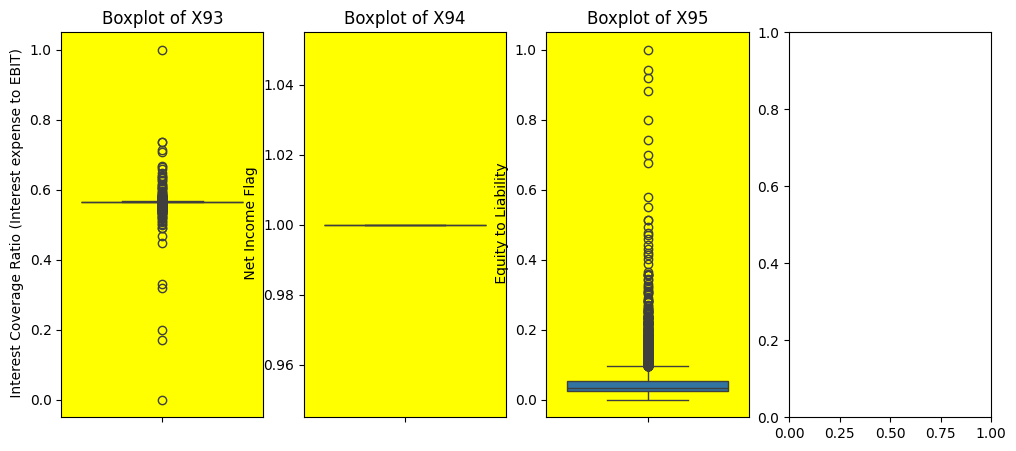

In [7]:
features = df.drop("Bankrupt?", axis = 1).columns
for i in range(24):
    fig,(ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize = (12,5))
    ax1 = sns.boxplot(df[features[i * 4]], ax = ax1)
    ax1.set_title(f"Boxplot of X{i * 4 + 1}")
    ax1.set_facecolor('yellow')
    ax2 = sns.boxplot(df[features[i * 4 + 1]], ax = ax2)
    ax2.set_title(f"Boxplot of X{i * 4 + 2}")
    ax2.set_facecolor("yellow")
    ax3 = sns.boxplot(df[features[i * 4 + 2]], ax = ax3)
    ax3.set_title(f"Boxplot of X{i * 4 + 3}")
    ax3.set_facecolor("yellow")
    if i < 23:
        ax4 = sns.boxplot(df[features[i * 4 + 3]], ax = ax4)
        ax4.set_title(f"Boxplot of X{i * 4 + 4}")
        ax4.set_facecolor("yellow")
        
        fig.suptitle("Outlier Analysis for the Features")
        
        plt.tight_layout()
        fig.set_facecolor('white')

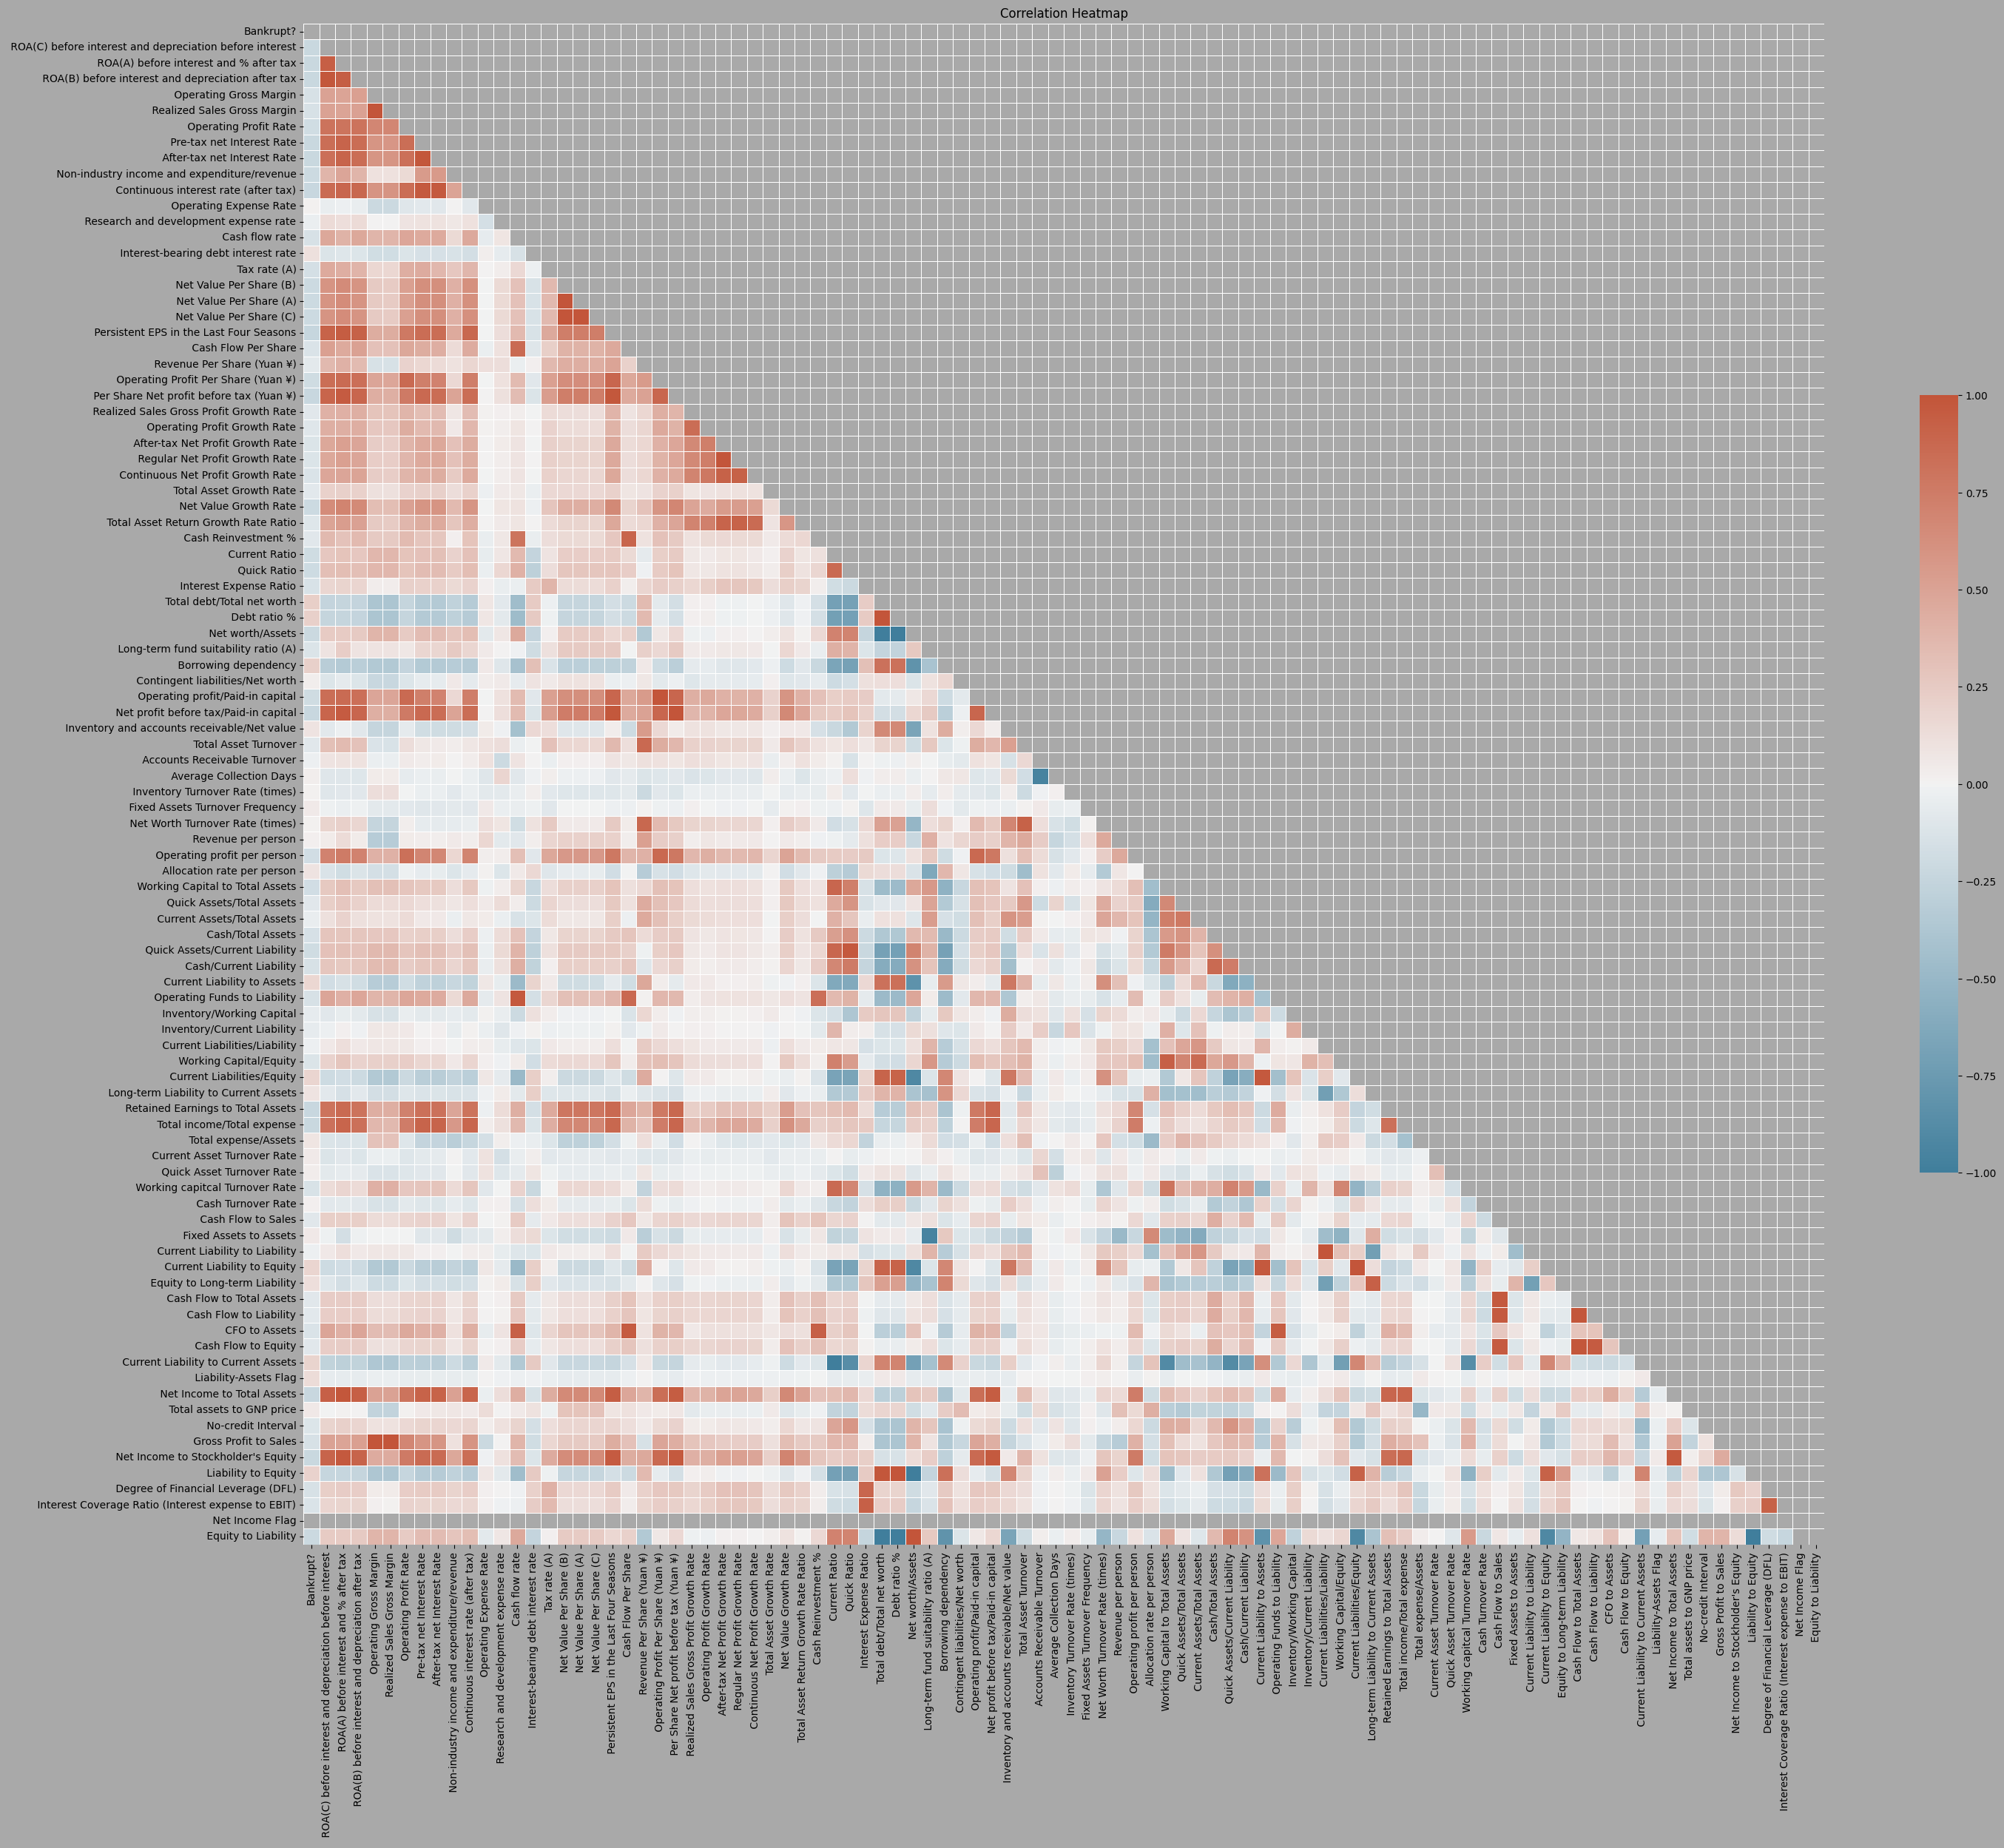

In [8]:
f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype = bool))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(mat, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, linewidths = .5, cbar_kws = {"shrink":.5})

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.gcf().patch.set_facecolor("darkgrey")
plt.gca().set_facecolor("darkgrey")

plt.show()

In [10]:
list1 = features
list2 = features
list_int = []
count = 1

for col1 in list1:
    list_int.append(col1)
    for col2 in list2:
        if col2 not in list_int:
            R_corr = df.corr().loc[col1,col2]
            if R_corr > 0.9 or R_corr < -0.9:
                print(count, ". ", col1, " -- ", col2, "; R = {:.3f}".format(R_corr))
                count += 1

1 .   ROA(C) before interest and depreciation before interest  --   ROA(A) before interest and % after tax ; R = 0.940
2 .   ROA(C) before interest and depreciation before interest  --   ROA(B) before interest and depreciation after tax ; R = 0.987
3 .   ROA(A) before interest and % after tax  --   ROA(B) before interest and depreciation after tax ; R = 0.956
4 .   ROA(A) before interest and % after tax  --   Net Income to Total Assets ; R = 0.962
5 .   ROA(B) before interest and depreciation after tax  --   Net Income to Total Assets ; R = 0.912
6 .   Operating Gross Margin  --   Realized Sales Gross Margin ; R = 1.000
7 .   Operating Gross Margin  --   Gross Profit to Sales ; R = 1.000
8 .   Realized Sales Gross Margin  --   Gross Profit to Sales ; R = 1.000
9 .   Operating Profit Rate  --   Pre-tax net Interest Rate ; R = 0.916
10 .   Operating Profit Rate  --   Continuous interest rate (after tax) ; R = 0.916
11 .   Pre-tax net Interest Rate  --   After-tax net Interest Rate ; R = 

In [9]:
def outlier_imputer(df, features):
    data_out = df.copy()
    for column in features:
        Q1 = data_out[column].quantile(0.25)
        Q3 = data_out[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lowerL = (Q1 - 1.5 * IQR)
        higherL = (Q3 + 1.5 * IQR)
        data_out.loc[data_out[column] < lowerL, column] = lowerL
        data_out.loc[data_out[column] > higherL, column] = higherL
    return data_out

data_in  = df.select_dtypes(include = 'float')
features_in = data_in.columns
capped_data = outlier_imputer(data_in, features_in)

In [10]:
data_int = df.select_dtypes(include = "int")
data2 = pd.concat([capped_data, data_int], axis = 1)
data2.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.387973          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.455122   
1                                 0.538214   
2                                 0.499019   
3                                 0.455122   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.442034    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.797096   
1                0.998946                    0.797380   
2                0.998857                    0.797096   
3                0.998781                    0.797096   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.809075                                      0.303288   
1                      0.809301                                      0.303556   
2                      0.809075                                      0.303288   
3                      0.809075                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...   No-credit Interval  \
0                               0.781314  ...             0.622879   
1                               0.781506  ...             0.623652   
2                               0.781314  ...             0.623841   
3                               0.781314  ...             0.622929   
4                               0.781550  ...             0.623521   

    Gross Profit to Sales   Net Income to Stockholder's Equity  \
0                0.601453                             0.836752   
1                0.610237                             0.839969   
2                0.601449                             0.836774   
3                0.583538                             0.836752   
4                0.598782                             0.839973   

    Liability to Equity   Degree of Financial Leverage (DFL)  \
0              0.288207                             0.026608   
1              0.283846                             0.027096   
2              0.288207                             0.026608   
3              0.281721                             0.026697   
4              0.278514                             0.026608   

    Interest Coverage Ratio (Interest expense to EBIT)   Equity to Liability  \
0                                           0.564309                0.016469   
1                                           0.566574                0.020794   
2                                           0.564309                0.016474   
3                                           0.564663                0.023982   
4                                           0.566574                0.035490   

   Bankrupt?   Liability-Assets Flag   Net Income Flag  
0          1                       0                 1  
1          1    

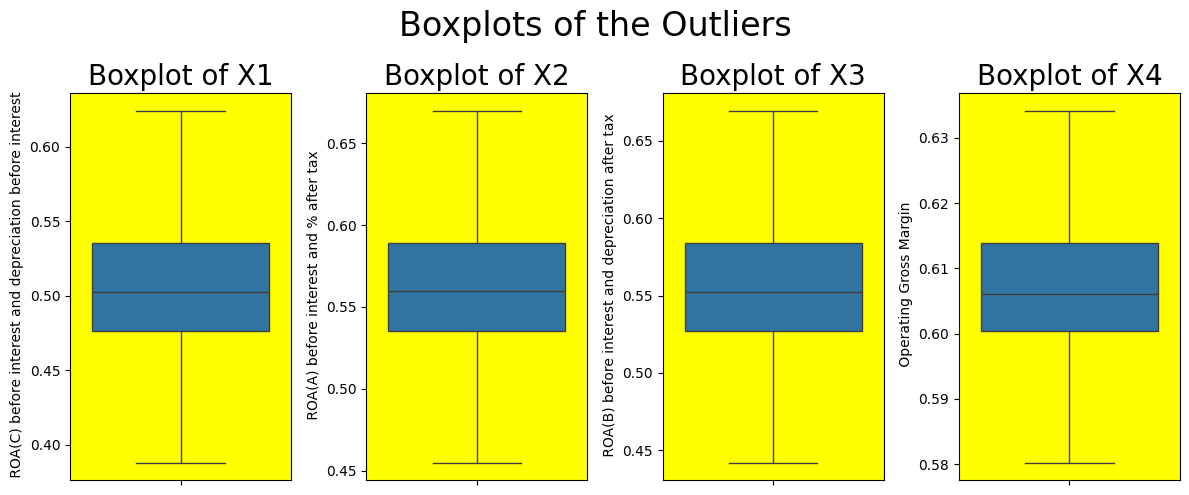

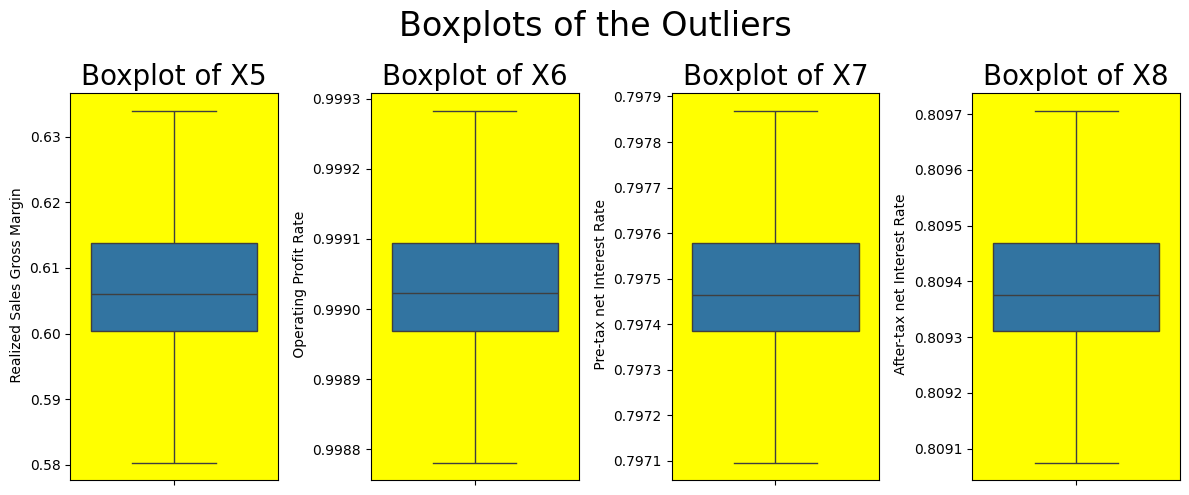

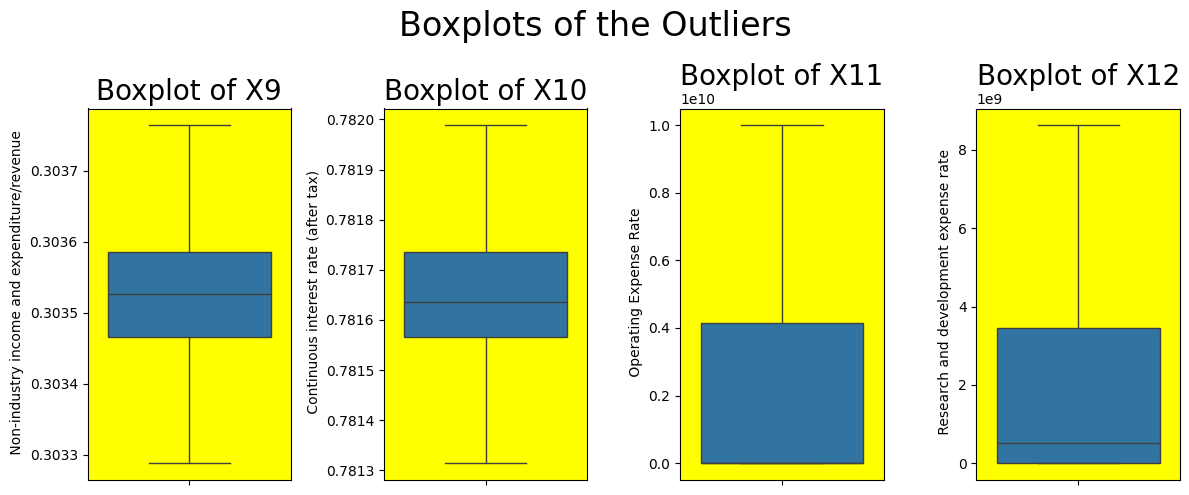

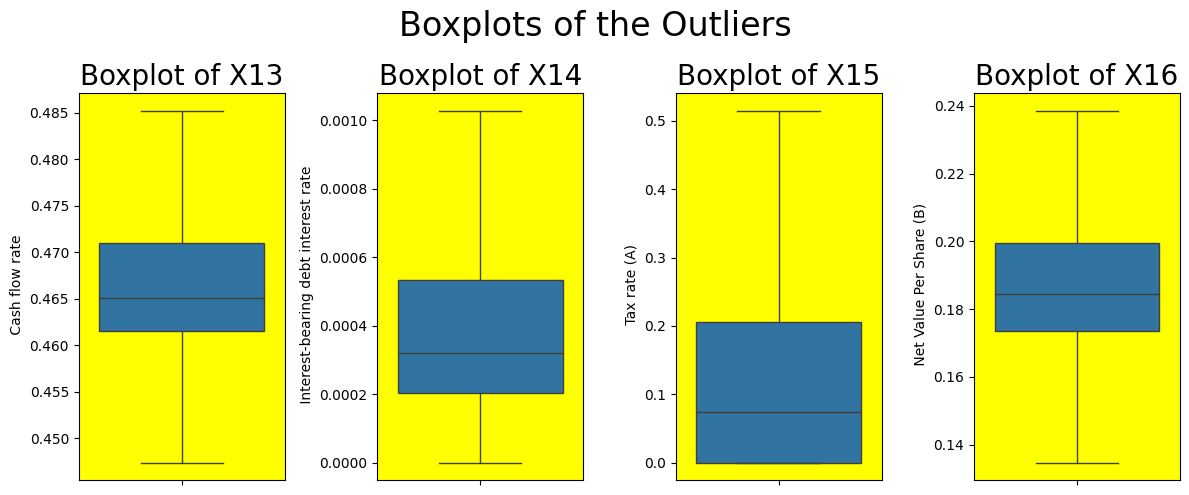

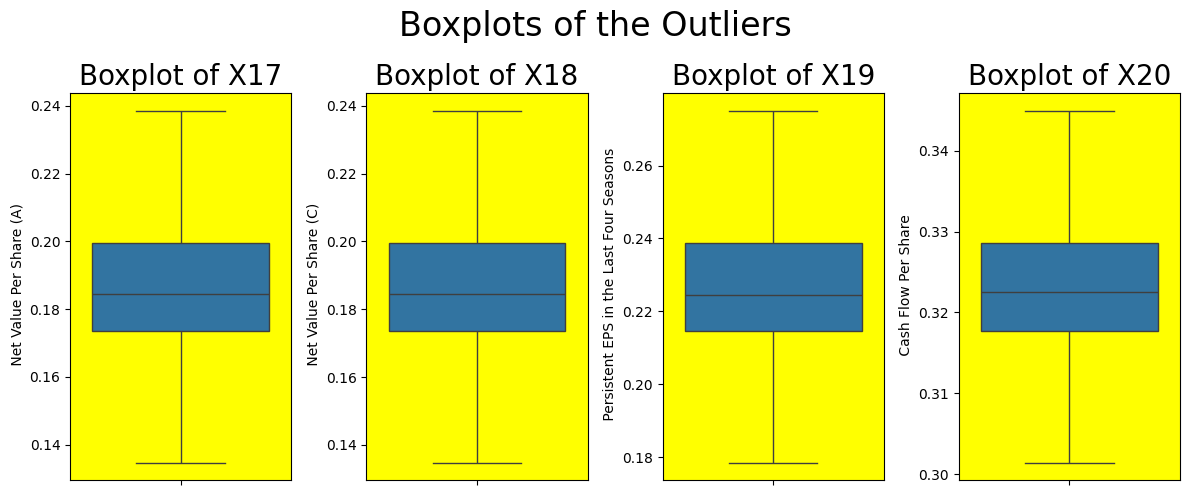

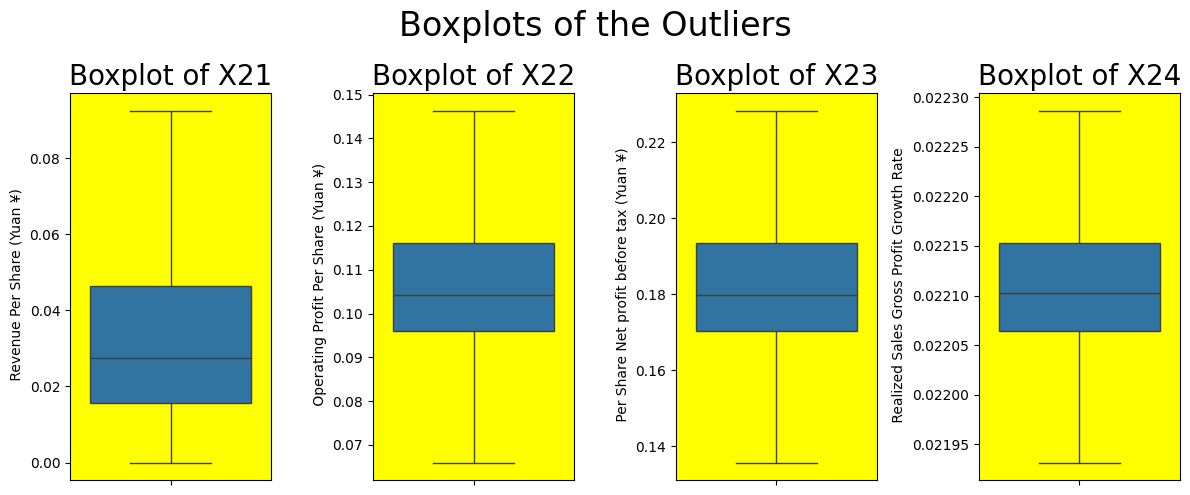

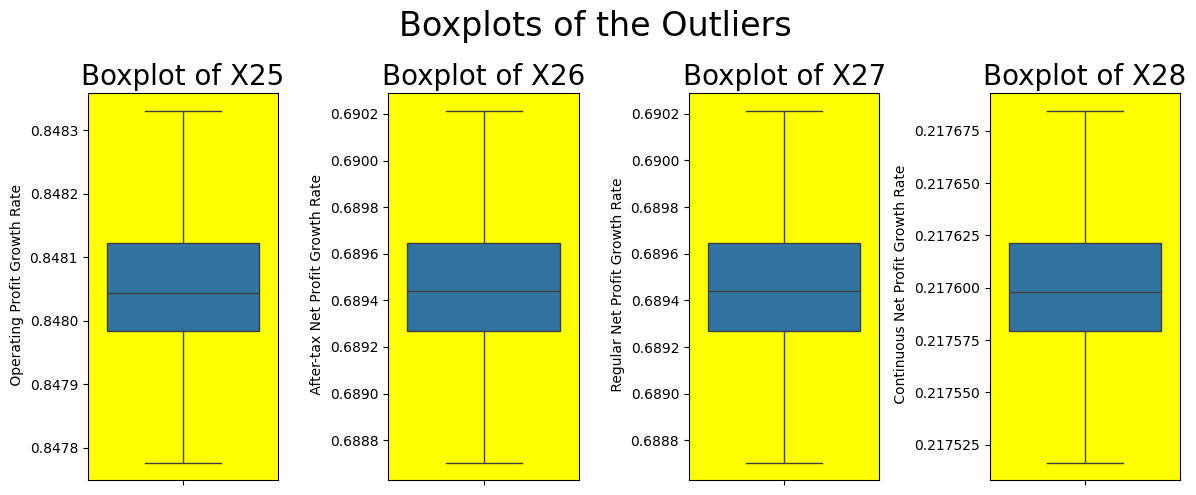

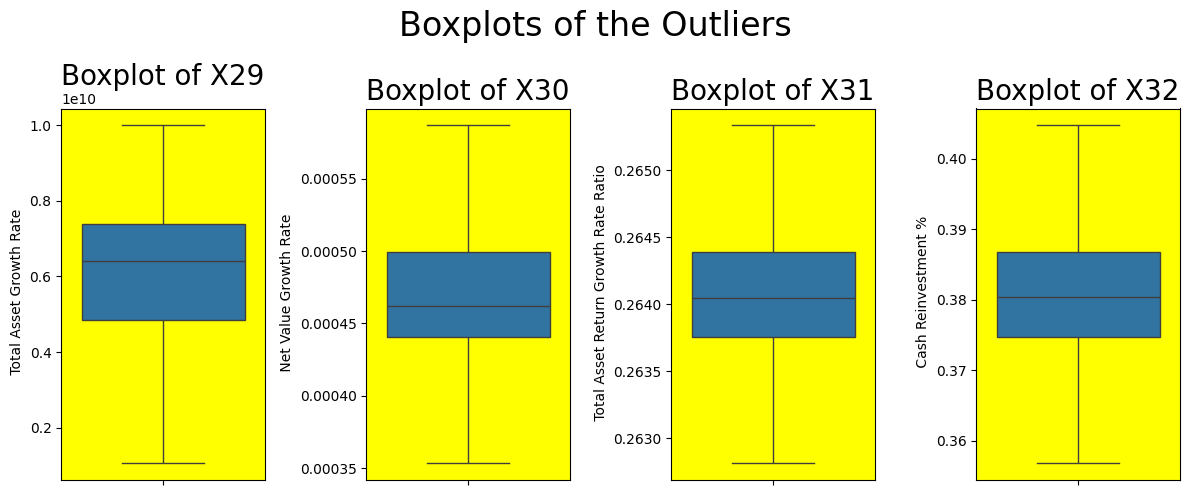

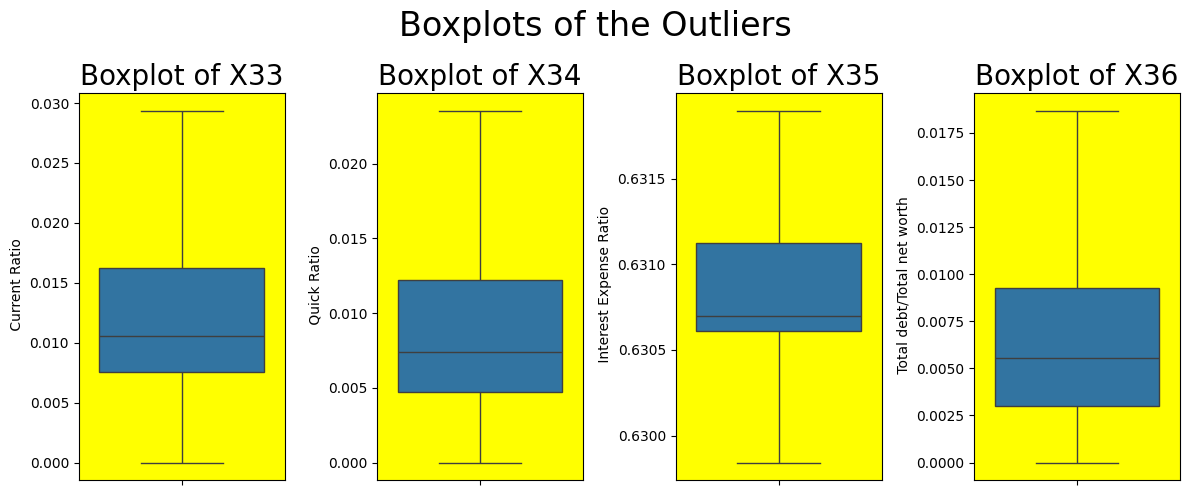

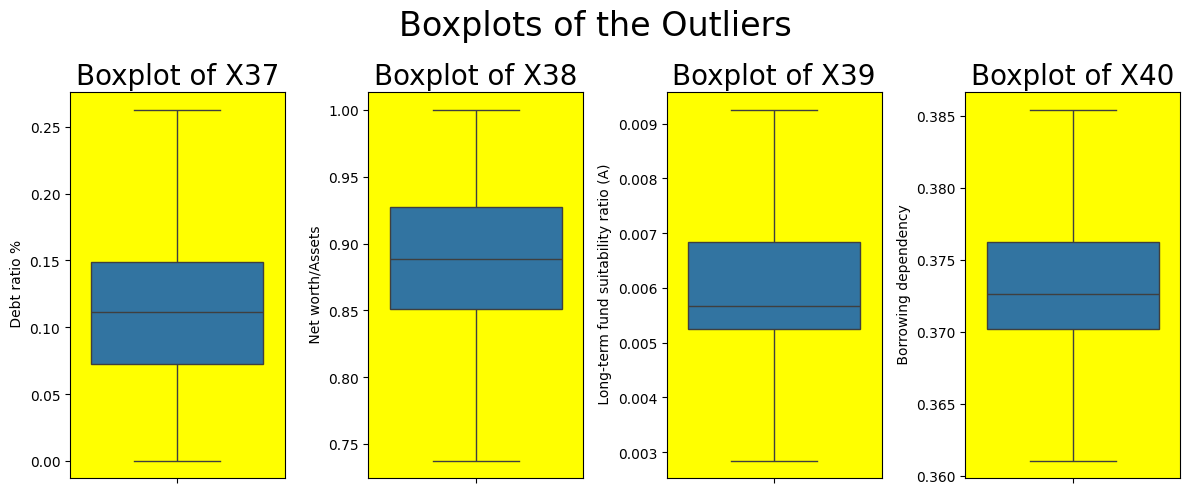

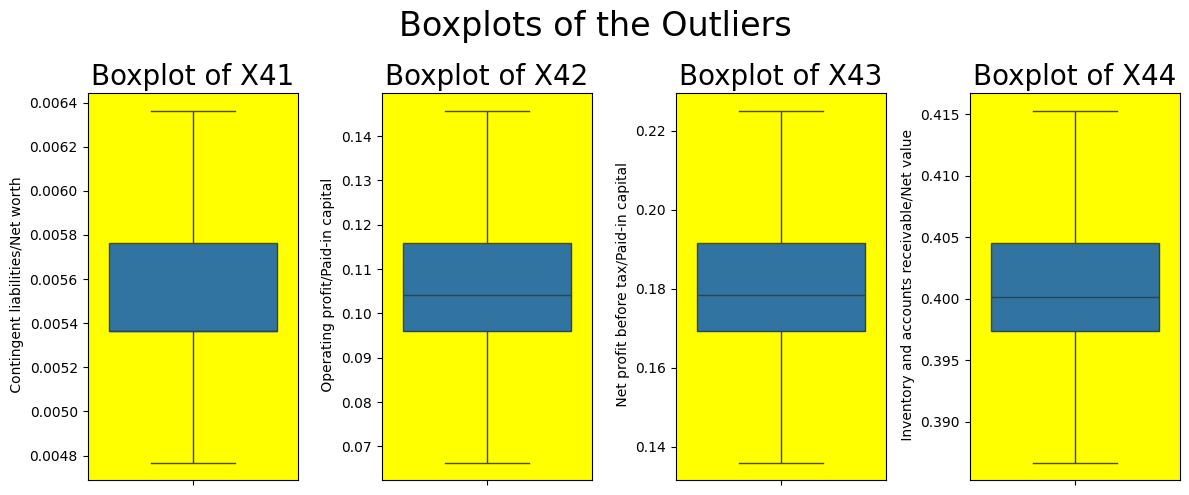

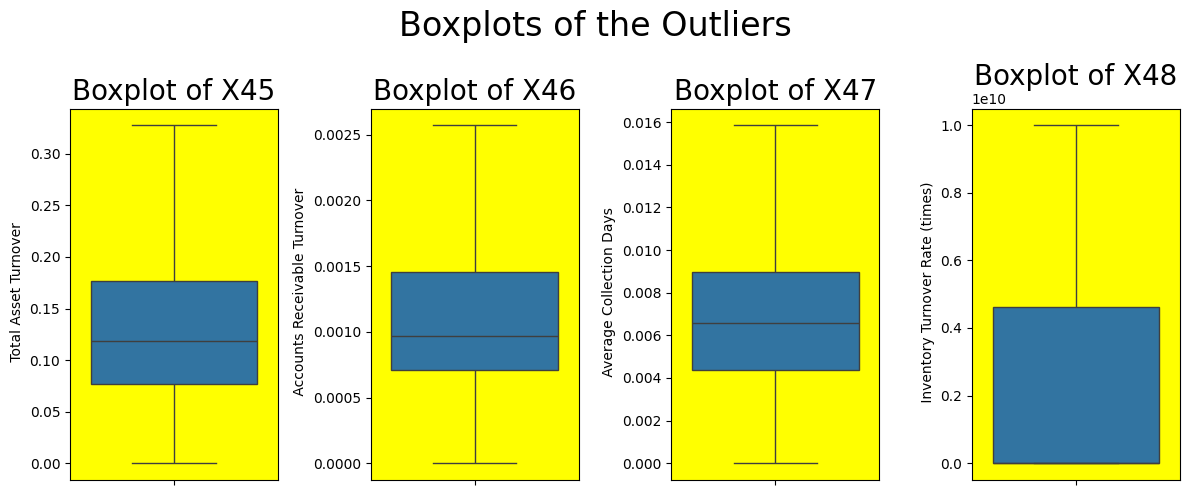

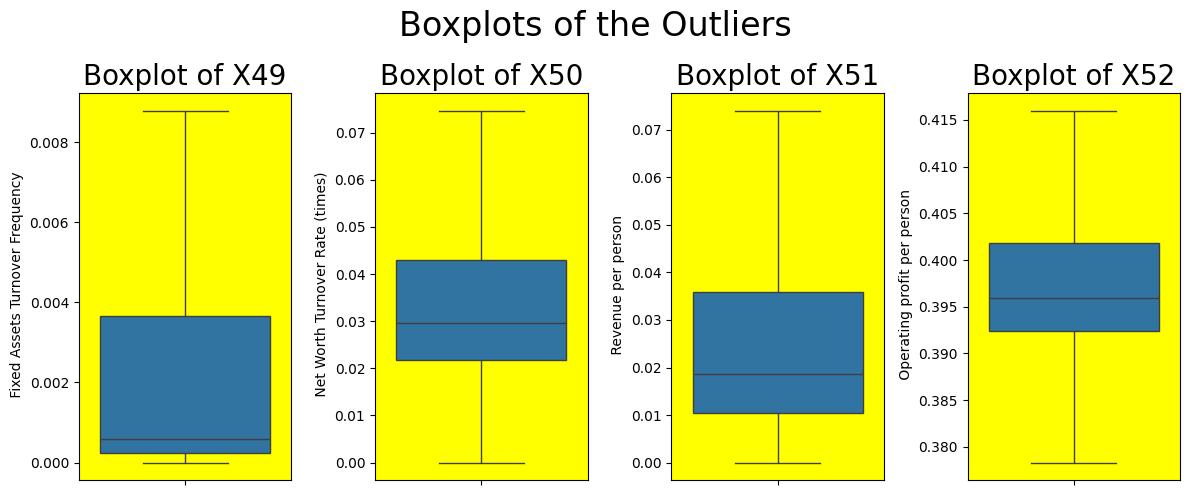

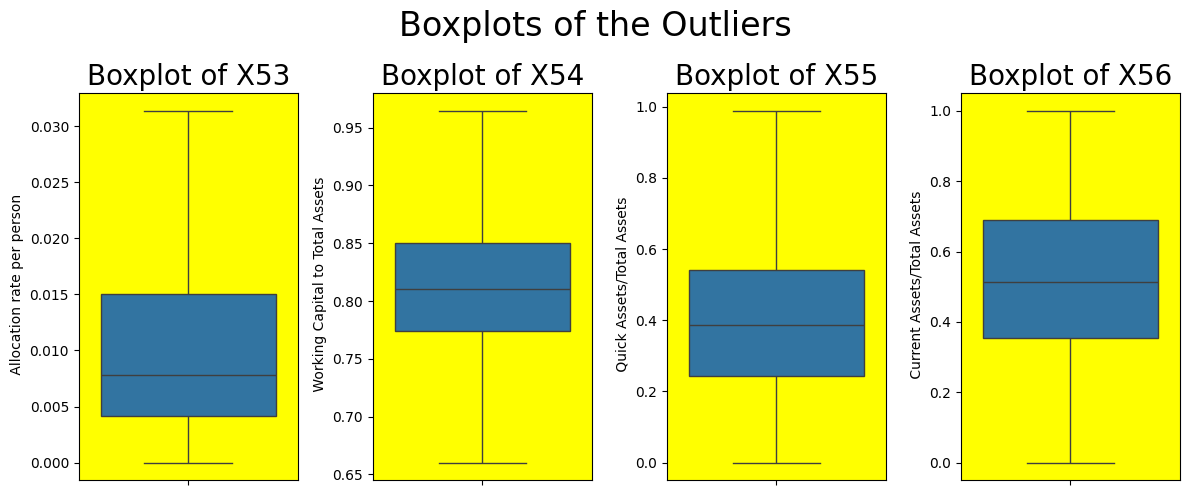

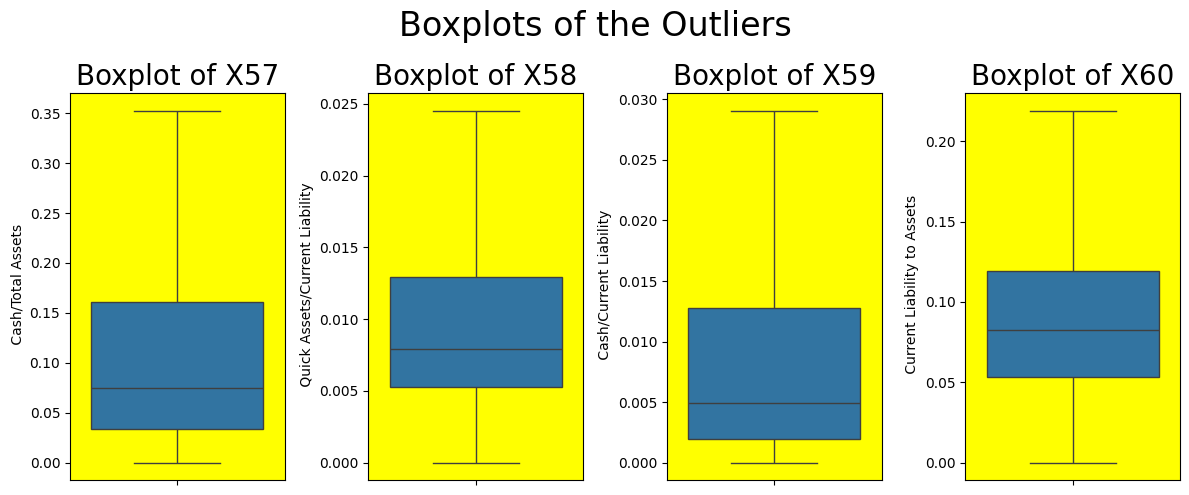

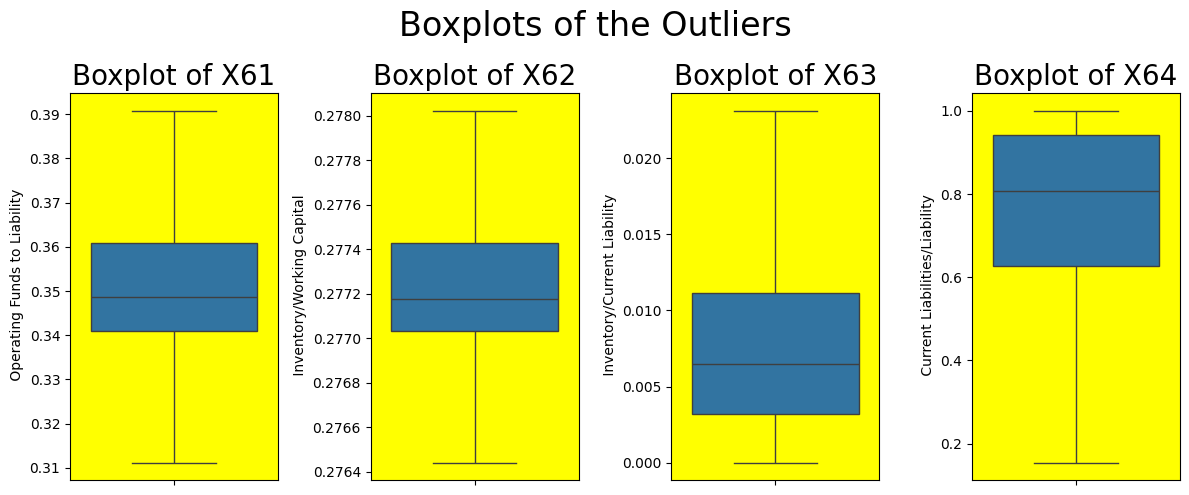

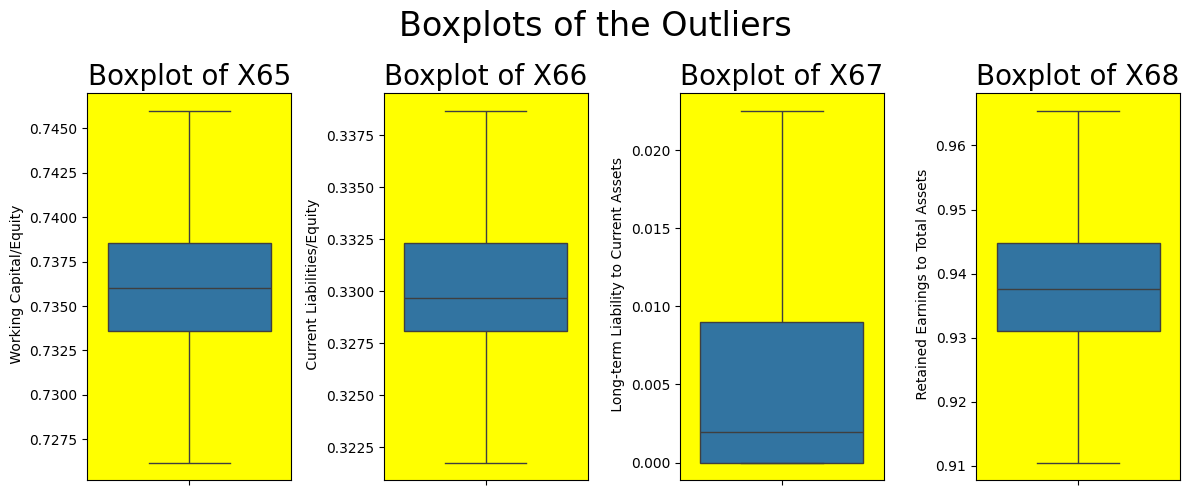

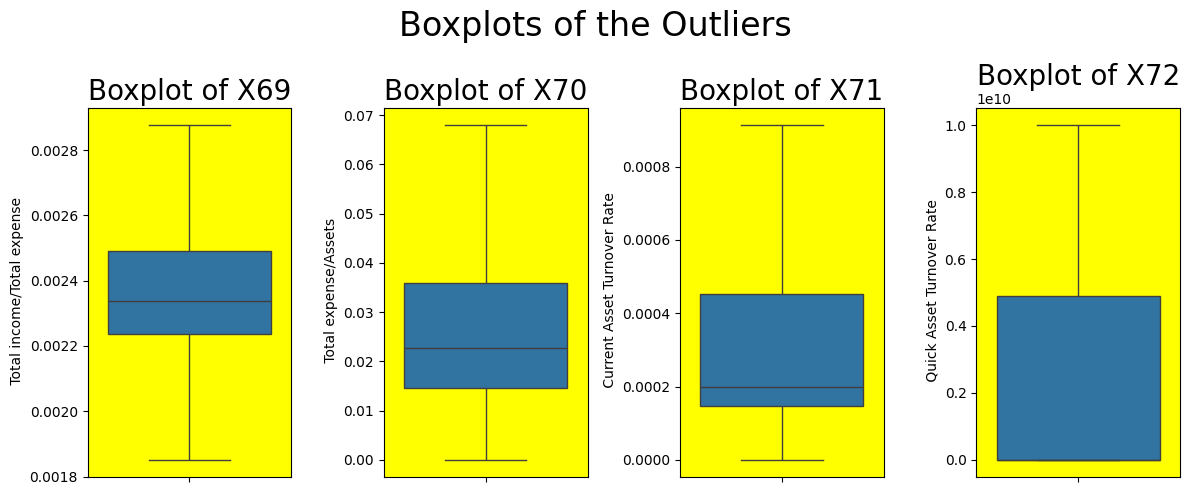

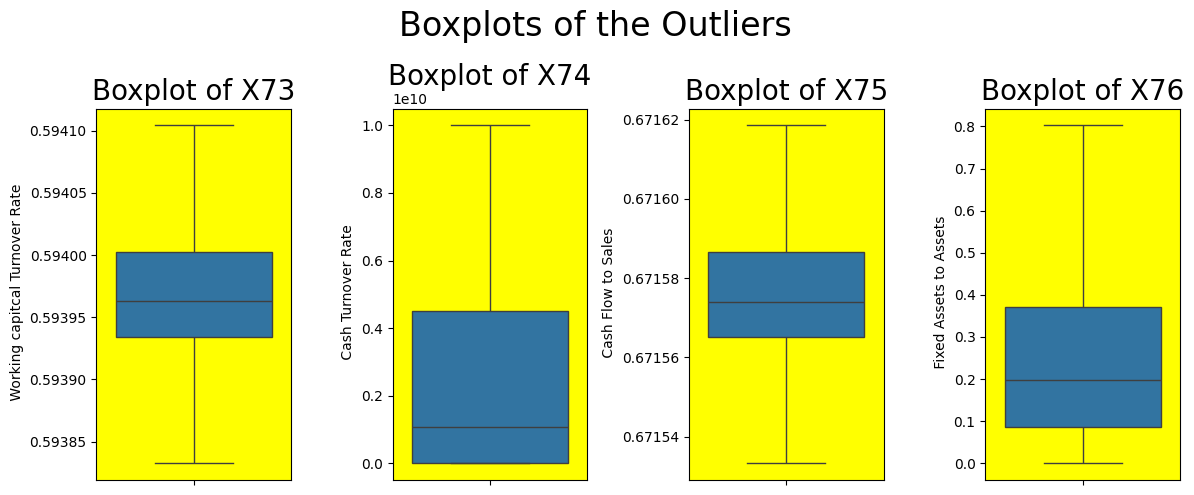

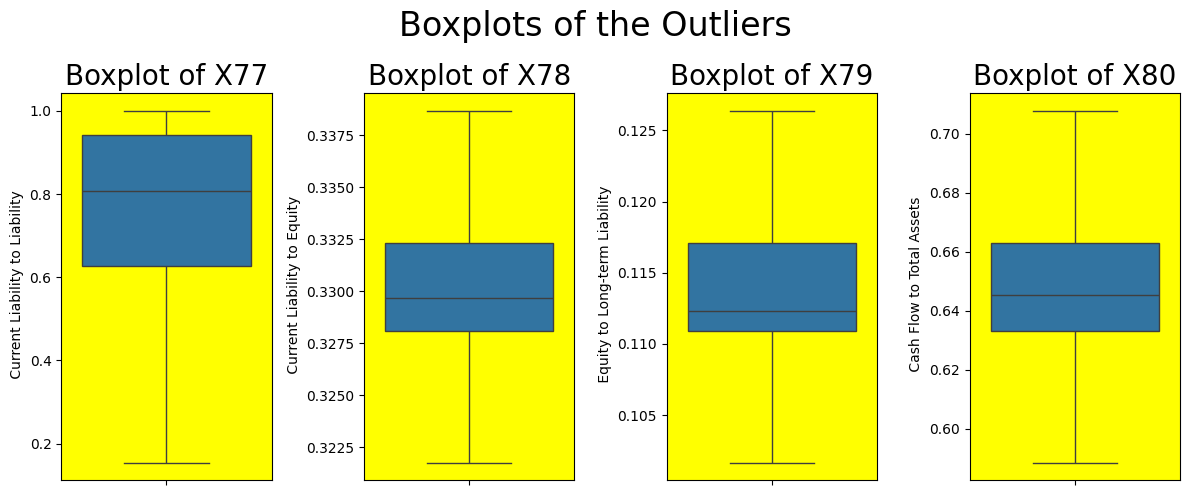

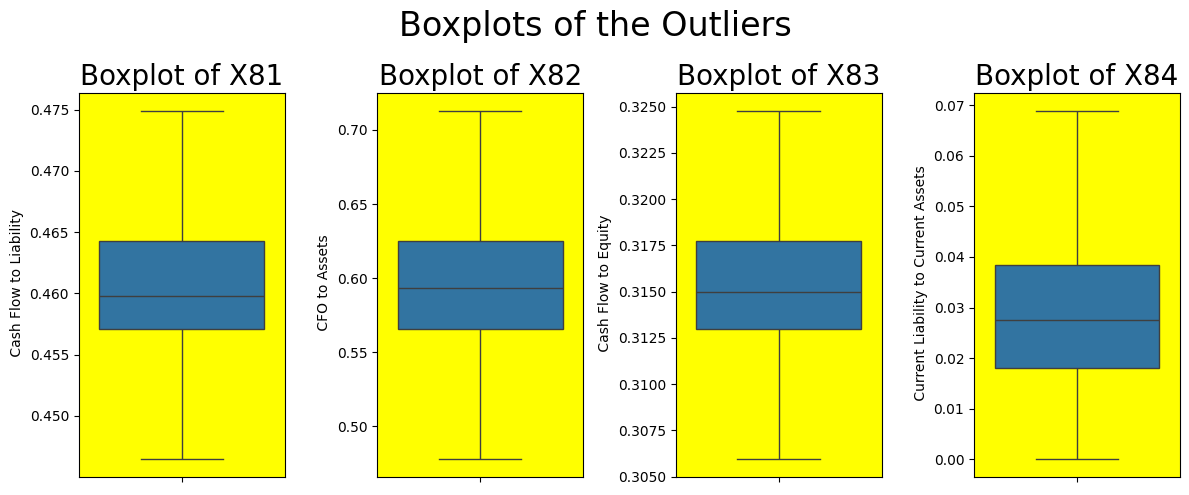

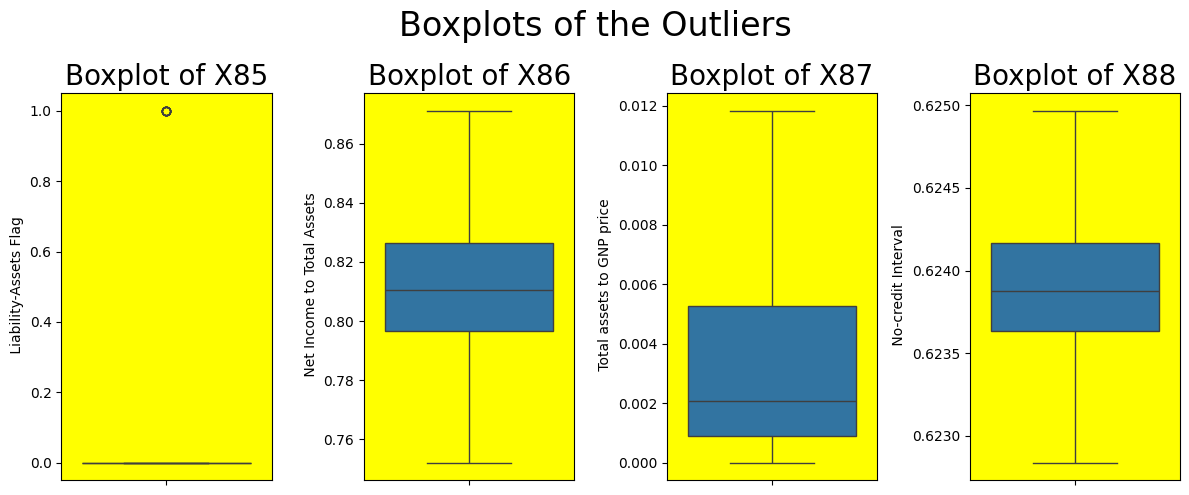

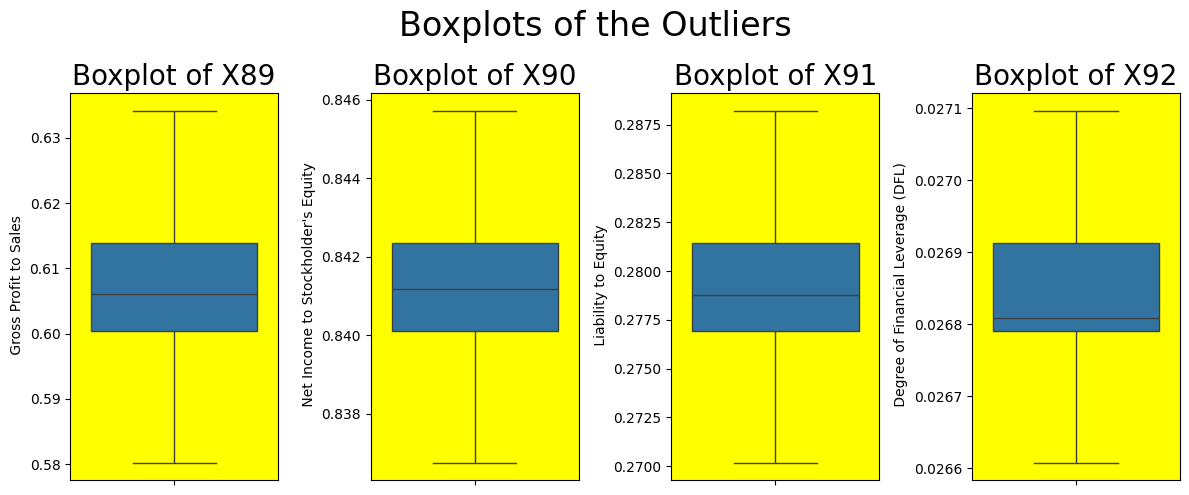

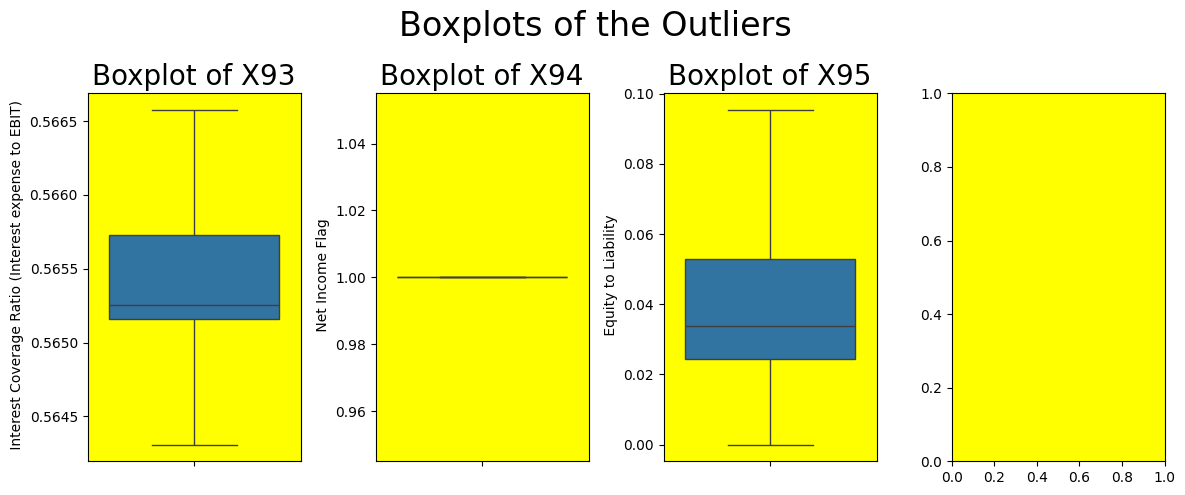

In [11]:
for i in range(24):
    fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(12,5))
    ax1 = sns.boxplot(data2[features[i*4]],ax=ax1)
    ax1.set_title(f'Boxplot of X{i*4+1}',fontsize=20)
    ax1.set_facecolor('yellow')
    ax2 = sns.boxplot(data2[features[i*4+1]],ax=ax2)
    ax2.set_title(f'Boxplot of X{i*4+2}',fontsize=20)
    ax2.set_facecolor('yellow')
    ax3 = sns.boxplot(data2[features[i*4+2]],ax=ax3)
    ax3.set_title(f'Boxplot of X{i*4+3}',fontsize=20)
    ax3.set_facecolor('yellow')
    if i < 23:
        ax4 = sns.boxplot(data2[features[i*4+3]],ax=ax4)
        ax4.set_title(f'Boxplot of X{i*4+4}',fontsize=20)
        ax4.set_facecolor('yellow')
    else:    
        ax4.set_facecolor('yellow')
    
    fig.suptitle("Boxplots of the Outliers",fontsize=24)
    
    plt.tight_layout()
    fig.set_facecolor('white')

In [12]:
X = data2.drop("Bankrupt?", axis = 1)
y = data2["Bankrupt?"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4773, 95) (2046, 95) (4773,) (2046,)


In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_overSampled, y_overSampled = smote.fit_resample(X_train, y_train)

In [15]:
len(X_train), len(X_overSampled)

(4773, 9238)

In [16]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 42, sampling_strategy = "majority")

X_underSampled, y_underSampled = rus.fit_resample(X_train, y_train)

In [17]:
len(X_train), len(X_underSampled)

(4773, 308)

In [18]:
X_test_under = X_test.copy()

labels = X_underSampled.columns

mm_scaler = MinMaxScaler()
X_underSampled[labels] = mm_scaler.fit_transform(X_underSampled[labels])
X_test_under[labels] = mm_scaler.transform(X_test_under[labels])

In [19]:
X_test_over = X_test.copy()

labels = X_overSampled.columns
X_overSampled[labels] = mm_scaler.fit_transform(X_overSampled[labels])
X_test_over[labels] = mm_scaler.transform(X_test_over[labels])

In [20]:
random_forest = RandomForestClassifier(random_state = 1, max_depth = 4)
random_forest.fit(X_underSampled, y_underSampled)

importances = pd.DataFrame({"feature": X_underSampled.columns, "importance":np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values("importance", ascending = False)

importances

feature  importance
18            Persistent EPS in the Last Four Seasons       0.068
68                         Total income/Total expense       0.051
42              Net profit before tax/Paid-in capital       0.048
2    ROA(B) before interest and depreciation after...       0.042
37                                   Net worth/Assets       0.042
..                                                ...         ...
11              Research and development expense rate       0.001
40                   Contingent liabilities/Net worth       0.001
93                              Liability-Assets Flag       0.000
47                    Inventory Turnover Rate (times)       0.000
94                                    Net Income Flag       0.000

[95 rows x 2 columns]

In [21]:
importances = importances[importances["importance"] > 0.02]
importances

feature  importance
18            Persistent EPS in the Last Four Seasons       0.068
68                         Total income/Total expense       0.051
42              Net profit before tax/Paid-in capital       0.048
2    ROA(B) before interest and depreciation after...       0.042
37                                   Net worth/Assets       0.042
35                         Total debt/Total net worth       0.042
22           Per Share Net profit before tax (Yuan ¥)       0.036
1              ROA(A) before interest and % after tax       0.034
39                               Borrowing dependency       0.033
36                                       Debt ratio %       0.033
84                         Net Income to Total Assets       0.032
89                                Liability to Equity       0.031
92                                Equity to Liability       0.030
9                Continuous interest rate (after tax)       0.029
67                  Retained Earnings to Total Assets       0.024
0    ROA(C) before interest and depreciation befor...       0.021

In [22]:
list_features = importances["feature"].to_list()

list_features

[' Persistent EPS in the Last Four Seasons',
 ' Total income/Total expense',
 ' Net profit before tax/Paid-in capital',
 ' ROA(B) before interest and depreciation after tax',
 ' Net worth/Assets',
 ' Total debt/Total net worth',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' ROA(A) before interest and % after tax',
 ' Borrowing dependency',
 ' Debt ratio %',
 ' Net Income to Total Assets',
 ' Liability to Equity',
 ' Equity to Liability',
 ' Continuous interest rate (after tax)',
 ' Retained Earnings to Total Assets',
 ' ROA(C) before interest and depreciation before interest']

In [23]:
list_remove = [' ROA(A) before interest and % after tax',
               ' ROA(C) before interest and depreciation before interest',
               ' Per Share Net profit before tax (Yuan ¥)',
               ' Net profit before tax/Paid-in capital',
               ' Debt ratio %',
               ' Liability to Equity']
list_features = list(set(list_features) - set(list_remove))
list_features

[' Persistent EPS in the Last Four Seasons',
 ' Retained Earnings to Total Assets',
 ' Net Income to Total Assets',
 ' Total debt/Total net worth',
 ' ROA(B) before interest and depreciation after tax',
 ' Net worth/Assets',
 ' Borrowing dependency',
 ' Total income/Total expense',
 ' Continuous interest rate (after tax)',
 ' Equity to Liability']

In [24]:
X_train_US2 = X_underSampled[X_underSampled.columns.intersection(list_features)]
X_test_US2 = X_test_under[X_test_under.columns.intersection(list_features)]

X_train_OS2 = X_overSampled[X_overSampled.columns.intersection(list_features)]
X_test_OS2 = X_test_over[X_test_over.columns.intersection(list_features)]

X_test_US2.head()

ROA(B) before interest and depreciation after tax  \
4893                                           0.611929   
1462                                           0.913389   
1645                                           0.695301   
1512                                           0.338495   
3966                                           0.555876   

      Continuous interest rate (after tax)  \
4893                              0.701498   
1462                              1.000000   
1645                              0.540174   
1512                              0.287262   
3966                              0.385512   

      Persistent EPS in the Last Four Seasons  Total debt/Total net worth  \
4893                                 0.856373                    0.122562   
1462                                 0.984804                    0.143285   
1645                                 1.000000                    0.466664   
1512                                 0.316176                    0.500956   
3966                                 0.378922                    0.188284   

      Net worth/Assets  Borrowing dependency  \
4893          0.765270              0.356606   
1462          0.736839              0.370671   
1645          0.448599              0.542468   
1512          0.428836              0.737860   
3966          0.680670              0.469443   

      Retained Earnings to Total Assets  Total income/Total expense  \
4893                           0.722932                    1.000000   
1462                           0.726007                    1.000000   
1645                           0.670259                    0.734747   
1512                           0.352870                    0.347326   
3966                           0.633774                    0.380963   

      Net Income to Total Assets  Equity to Liability  
4893                    0.684421             0.632149  
1462                    0.846002             0.559646  
1645                    0.678477             0.231855  
1512                    0.305206             0.221057  
3966                    0.373964             0.452330

In [25]:
def get_test_scores(model_name, preds, y_test_data):
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds, average = "macro")
    recall = recall_score(y_test_data, preds, average = "macro")
    f1 = f1_score(y_test_data, preds, average = "macro")

    table = pd.DataFrame({"model":[model_name],
                         "precision":[precision],
                         "recall":[recall],
                         "f1":[f1],
                         "accuracy":[accuracy]})
    return table

In [47]:
random_forest = RandomForestClassifier(class_weight='balanced')

random_forest.fit(X_train_US2,y_underSampled)

# Use the model to predict on train data
rf_train_preds = random_forest.predict(X_train_US2)

rf_train_results = get_test_scores('RF (train, undersampled)',rf_train_preds,y_underSampled)
rf_train_results

model  precision  recall   f1  accuracy
0  RF (train, undersampled)        1.0     1.0  1.0       1.0

In [48]:
rf_test_preds = random_forest.predict(X_test_US2)

rf_test_results = get_test_scores("RF (test, undersampled)", rf_test_preds, y_test)

rf_test_results

model  precision    recall        f1  accuracy
0  RF (test, undersampled)    0.57671  0.843687  0.593408  0.853372

In [49]:
xgb1 = XGBClassifier(objective = "binary:logistic", random_state = 42)

xgb1.fit(X_train_US2, y_underSampled)

xgb_train_preds = xgb1.predict(X_train_US2)
xgb_train_results = get_test_scores("XGB (train, undersampled)", xgb_train_preds, y_underSampled)
xgb_train_results

model  precision  recall   f1  accuracy
0  XGB (train, undersampled)        1.0     1.0  1.0       1.0

In [54]:
xgb_test_preds = xgb1.predict(X_test_US2)
xgb_test_results = get_test_scores("XGB (test, undersampled)", xgb_test_preds, y_test)
xgb_test_results

model  precision    recall        f1  accuracy
0  XGB (test, undersampled)   0.564901  0.834343  0.566518  0.821114

In [30]:
xgb2 = XGBClassifier(objective = "binary:logistic", random_state = 42)
cv_params = {"max_depth":[None,2,3,4,5], 
             "min_child_weight":[4,5,6],
             "learning_rate": [0.01,0.05,0.1, 0.2],
             "n_estimators":[150,200,300]}
scoring = ["accuracy", "precision", "recall", "f1"]
xgb_cv = GridSearchCV(xgb2, cv_params, scoring = scoring, cv = 4, refit = "accuracy")

In [31]:
xgb_cv.fit(X_train_US2, y_underSampled)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [None, 2, 3, 4, 5],
                         'min_child_weight': [4, 5, 6],
                         'n_estimators': [150, 200, 300]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [55]:
xgb_cv_test_preds = xgb_cv.best_estimator_.predict(X_test_US2)

xgb_cv_test_results = get_test_scores("XGB CV (test, undersampled)", xgb_cv_test_preds, y_test)

xgb_cv_test_results

model  precision    recall        f1  accuracy
0  XGB CV (test, undersampled)   0.643821  0.710101  0.669689  0.949169

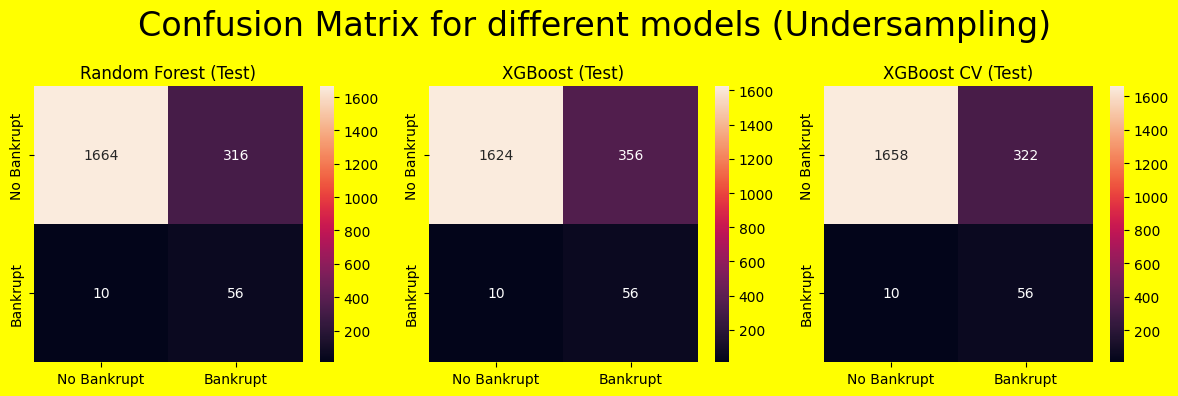

In [33]:
cm_rf_test = confusion_matrix(y_test, rf_test_preds, labels = random_forest.classes_)
cm_xgb_test = confusion_matrix(y_test, xgb_test_preds, labels = xgb1.classes_)
cm_xgb_cv_test = confusion_matrix(y_test, xgb_cv_test_preds, labels = xgb_cv.classes_)

fig,(ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (12,4))

ax1 = sns.heatmap(cm_rf_test, annot = True, ax = ax1, fmt = ".4g")
ax1.xaxis.set_ticklabels(["No Bankrupt", "Bankrupt"])
ax1.yaxis.set_ticklabels(["No Bankrupt", "Bankrupt"])
ax1.set_title("Random Forest (Test)")

ax2 = sns.heatmap(cm_xgb_test, annot = True, ax = ax2, fmt = ".4g")
ax2.xaxis.set_ticklabels(["No Bankrupt", "Bankrupt"])
ax2.yaxis.set_ticklabels(["No Bankrupt", "Bankrupt"])
ax2.set_title("XGBoost (Test)")

ax3 = sns.heatmap(cm_xgb_cv_test, annot = True, ax = ax3, fmt = ".4g")
ax3.xaxis.set_ticklabels(["No Bankrupt", "Bankrupt"])
ax3.yaxis.set_ticklabels(["No Bankrupt", "Bankrupt"])
ax3.set_title("XGBoost CV (Test)")

fig.suptitle("Confusion Matrix for different models (Undersampling)", fontsize = 24)

plt.tight_layout()
fig.set_facecolor("Yellow")

In [56]:
random_forest = RandomForestClassifier(class_weight = 'balanced')
random_forest.fit(X_train_OS2, y_overSampled)
rf_train_preds = random_forest.predict(X_train_OS2)
rf_train_results = get_test_scores("RF (train oversampled)", rf_train_preds, y_overSampled)
rf_train_results

model  precision  recall   f1  accuracy
0  RF (train oversampled)        1.0     1.0  1.0       1.0

In [57]:
rf_test_preds = random_forest.predict(X_test_OS2)

rf_test_over_results = get_test_scores("RF (test, oversampled)", rf_test_preds, y_test)
rf_test_over_results

model  precision    recall        f1  accuracy
0  RF (test, oversampled)   0.626612  0.795707  0.670222  0.930596

In [35]:
%%time
xgb_cv.fit(X_train_OS2, y_overSampled)

CPU times: total: 22min 55s
Wall time: 3min 9s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [None, 2, 3, 4, 5],
                         'min_child_weight': [4, 5, 6],
                         'n_estimators': [150, 200, 300]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [58]:
xgb_cv_test_preds = xgb_cv.best_estimator_.predict(X_test_OS2)
xgb_cv_test_over_results = get_test_scores("XGB CV(test, oversampling)", xgb_cv_test_preds, y_test)
xgb_cv_test_over_results

model  precision    recall        f1  accuracy
0  XGB CV(test, oversampling)   0.629349  0.762374  0.668772   0.93695

In [37]:
rf = RandomForestClassifier(random_state = 42)

cv_params = {"max_depth":[2,3,4,5,None], "max_features":[1.0], "max_samples":[1.0], "min_samples_leaf":[2,3,4], "min_samples_split":[2,3,4], "n_estimators":[200,300,400]}
scoring = ["accuracy", "precision", "recall", "f1"]

rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = "accuracy")

In [59]:
%%time
rf_cv.fit(X_train_OS2, y_overSampled)

CPU times: total: 1h 18min 49s
Wall time: 1h 20min 40s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200, 300, 400]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [60]:
rf_grid_test_preds = rf_cv.best_estimator_.predict(X_test_OS2)
rf_grid_test_over_results = get_test_scores("RF Grid (test, oversampling)", rf_grid_test_preds, y_test)
rf_grid_test_over_results

model  precision    recall        f1  accuracy
0  RF Grid (test, oversampling)   0.616267  0.765404  0.655234  0.928641

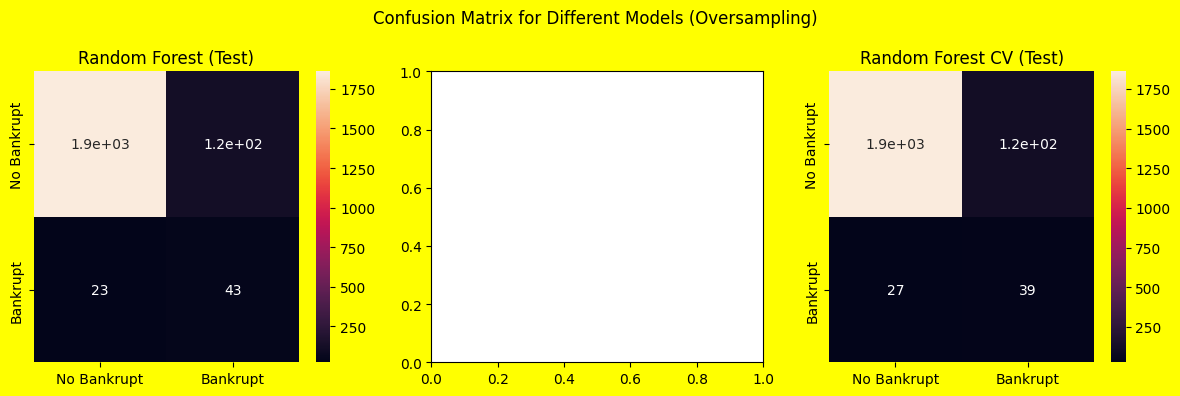

In [64]:
cm_rf2_test = confusion_matrix(y_test, rf_test_preds, labels = random_forest.classes_)
cm_xgb_2_test = confusion_matrix(y_test, xgb_cv_test_preds, labels = xgb_cv.classes_)
cm_rf2_cv_test = confusion_matrix(y_test, rf_grid_test_preds, labels = rf_cv.classes_)

fig, (ax1, ax, ax3) = plt.subplots(ncols = 3, figsize =(12,4))

ax1 = sns.heatmap(cm_rf2_test, annot = True, ax = ax1)
ax1.xaxis.set_ticklabels(["No Bankrupt", "Bankrupt"])
ax1.yaxis.set_ticklabels(["No Bankrupt", "Bankrupt"])
ax1.set_title("Random Forest (Test)")

ax2 = sns.heatmap(cm_xgb_2_test, annot = True, ax = ax2)
ax2.xaxis.set_ticklabels(["No Bankrupt", "Bankrupt"])
ax2.yaxis.set_ticklabels(["No Bankrupt", "Bankrupt"])
ax2.set_title("XGBoost (Test)")

ax3 = sns.heatmap(cm_rf2_cv_test, annot = True, ax = ax3)
ax3.xaxis.set_ticklabels(["No Bankrupt", "Bankrupt"])
ax3.yaxis.set_ticklabels(["No Bankrupt", "Bankrupt"])
ax3.set_title("Random Forest CV (Test)")

fig.suptitle("Confusion Matrix for Different Models (Oversampling)")

plt.tight_layout()
fig.set_facecolor("yellow")

In [61]:
results = pd.concat([rf_test_results, xgb_test_results, xgb_cv_test_results, rf_test_over_results, xgb_cv_test_over_results, rf_grid_test_over_results], axis = 0)
results.sort_values(by = ['accuracy'], ascending = False)

model  precision    recall        f1  accuracy
0   XGB CV (test, undersampled)   0.643821  0.710101  0.669689  0.949169
0    XGB CV(test, oversampling)   0.629349  0.762374  0.668772  0.936950
0        RF (test, oversampled)   0.626612  0.795707  0.670222  0.930596
0  RF Grid (test, oversampling)   0.616267  0.765404  0.655234  0.928641
0       RF (test, undersampled)   0.576710  0.843687  0.593408  0.853372
0      XGB (test, undersampled)   0.564901  0.834343  0.566518  0.821114